<div class="alert alert-block alert-info" background: linear-gradient(90deg, #8360c3, #2ebf91);>
    <span style="color: blue;" font-family:'Arial';">
        <h1>
            <center>
                Projet 7 - Détectez les Bad Buzz grâce au Deep Learning
            </center>
        </h1>
    </span>
</div>

---

## <a> <center><big> Sommaire </center></big></a>

## <a href="#C1"> Présentation du Projet</a>

## <a href="#C2">Partie 1 - Présentation générale du jeu de données</a>

- <a href="#C3">I - Lecture des données</a>
- <a href="#C4">II - Text Processing</a> 

## <a href="#C5">Partie 2- Préparation de l'environnement MLFlow</a>

- <a href="#C6">I - Tracking & Stockage</a>
- <a href="#C7">II - Fonctions de Tracking</a>

## <a href="#C8">Partie 3 : Elaboration des Modèles sur mesure simple</a>

- <a href="#C9">I - Séparation des données</a>
- <a href="#C10">II - Création du bag of words pondéré par TF-IDF</a>
- <a href="#C11">III - Création des premiers modèles sur mesures simples</a>
- <a href="#C12">IV - Optimisation du meilleur Modèle</a>

## <a href="#C13">Partie 4 : Elaboration des Modèles sur mesure avancés</a>

- <a href="#C14">I - Choix du modèle</a>
- <a href="#C15">II - Choix de la méthode de pré-traitement</a>
- <a href="#C16">III - Choix du Word Embedding</a>
- <a href="#C17">IV - Choix du modèle final</a>
- <a href="#C18">V - Modèle BERT (hugging face)</a>

## <a href="#C19">Partie 5 : Démarche orientée MLOps</a>

- <a href="#C20">I - Principe du MLOps</a>
- <a href="#C21">II - Application</a>

## <a href="#C22"> Conclusion </a>
    
<br></br>
___

## <div class="alert alert-block alert-info"><a name="C1"><center> Présentation du Projet</a></center></div>

<center><h3><span style = "color : blue">Détectez les Bad Buzz grâce au Deep Learning</span></h3></center>

Nous avons été missionné par `Air Paradis` pour <span style = "color: blue">créer un produit IA</span> permettant **d’anticiper les bad buzz** sur les réseaux sociaux. Suite au rendez-vous de cadrage avec les équipes de Air Paradis et aux échange avec le manager nous avons noté les éléments suivants:

<span style = "color :  darkgreen"> Objectif et resources du projet</span></br>
- Air Paradis veut un <span style = "color: blue">prototype d’un produit IA</span> permettant de <span style = "color: blue">prédire le sentiment associé à un tweet.</span>

- Nous n'avons pas de données clients chez Air Paradis, nous devrons utiliser des <span style = "color: blue">données Open Source</span>. Pour cela nous disposerons des <span style = "color: blue">informations sur les tweets</span> et d'un <span style = "color: blue">label binaire exprimant un sentiment négatif ou non</span>.

<span style = "color :  darkgreen"> Travail à réaliser</span></br>
- <span style = "color: blue">Préparer un prototype</span> fonctionnel du modèle: Le modèle envoie un tweet et récupère la prédiction de sentiment.</br> 
- <span style = "color: blue">Préparer un support de présentation</span> **explicitant la méthodologie** utilisée pour l’approche **“modèle sur mesure avancé”**.</br>

<span style = "color :  darkgreen"> Précision du besoin</span></br>
Tester plusieurs approches afin de pouvoir généraliser à d’autres cas d’usage:
- une approche <span style = "color: blue">“Modèle sur mesure simple”</span> pour développer rapidement un modèle classique (tel que la régression logistique) permettant de **prédire le sentiment associé** à un tweet.

- une approche <span style = "color: blue">“Modèle sur mesure avancé”</span> pour développer un modèle basé sur des réseaux de neurones profonds pour **prédire le sentiment associé** à un tweet. C'est le modèles à déployer et montrer à `Air Paradis`. Pour cette $2^{ème}$ approche, penser à: 
   - Essayer au moins <span style = "color: blue">deux word embeddings différents</span>, et à garder celui qui permet d’obtenir <span style = "color: blue">les meilleures performances</span>.</br>
   
    - En complément, regarder <span style = "color: blue">l’apport en performance d’un modèle BERT</span> ce qui permet de voir si l'entreprise doit investir dans ce type de modèle.</br>

- <span style = "color: darkgreen">Mettre en oeuvre un exemple de démarche orientée MLOps</span> C'est une priorité pour le manager.
   
   - Démontrer tout <span style = "color: blue">l’apport du MLOps</span> afin d’assurer une diffusion aux autres équipes, pour cela:</br>
     1. Réaliser <span style = "color: blue">une présentation synthétique des principes du MLOps et ses apports</span>.</br>

     2. Utiliser l’outil `MLFlow` pour assurer la gestion des expérimentations des modèles: <span style = "color: blue">tracking et reporting</span> de l’entraînement des modèles, <span style = "color: blue">centralisation du stockage</span> des modèles et <span style = "color: blue">test du serving</span> proposé par MLFlow.</br>

     3. Mettre en œuvre un <span style = "color: blue">pipeline de déploiement continu</span> du modèle choisi via une API **(Git/Github + Azure WebApp)**, qui intègre également des <span style = "color: blue">tests unitaires automatisés</span>. 
     
     4. Comme l'entreprise souhaite limiter les coûts de mise en production de ce prototype, <span style = "color: blue">privilégier une solution gratuite Cloud</span> pour l’API. (exp: Azure WebApp).</br> Si le modèle avancé est **trop lourd et induit un dépassement des limites** de taille des solutions gratuites, tu pourras tester le déploiement avec le modèle classique, ou bien **utiliser des techniques de réduction de taille** de ton modèle TensorFlow-Keras **via une conversion en TensorFlow Lite**.

- Pour terminer, rédiger un <span style = "color: blue">petit article de blog</span> à partir du **travail de modélisation et de la démarche orientée MLOps**.</br>

---

In [1]:
!python --version

Python 3.9.18


In [2]:
#################################   IMPORTS DES BIBILOTHEQUES  ########################################
#!pip install WordCloud

# numpy et pandas et pandarallel pour la manipulation des données 
import numpy as np
import pandas as pd 
from pandarallel import pandarallel

# matplotlib, Seaborn et Wordcloud pour l'affichage
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud

In [3]:
#Re, Spacy et NLTK pour le nettoyage des tweets

import re
import spacy



from nltk.stem import PorterStemmer

In [4]:
import time

### Sklearn ###

#Traitement + Affichage + Métriques
from sklearn.model_selection import train_test_split #Séparation 
from sklearn.feature_extraction.text import TfidfVectorizer #TF-idf
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, auc 

#Modèles sur mesure simples
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

#GridSearch pour l'optimisation
from sklearn.model_selection import GridSearchCV

In [5]:
!pip install plot_keras_history
import tensorflow as tf
import keras
### Keras ###
from keras.models import load_model
#Traitement + Affichage
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from plot_keras_history import show_history, plot_history


#Modèles sur mesure avancés 

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM, Bidirectional

In [6]:

#Gensim pour WordEmbedding
import gensim.downloader as api



In [7]:
#!pip install transformers

#Transformers pour le model BERT
from transformers import BertTokenizer, TFBertForSequenceClassification

C:\Users\kfaiz\anaconda3\envs\Projet_7_Thierry_Test2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
from wordcloud import WordCloud

## 
<div class="alert alert-block alert-info"><a name="C2"><center> Partie 1 - Présentation générale du jeu de données</a></center></div>

<a name="C3"><h2><span style = "color : blue">I - Lecture des données</span></h2></a>

<h3><span style = "color : darkgreen">1 - Création du Dataframe</span></h3> 

Nous allons procéder au chargement de notre Dataset:

In [9]:
df = pd.read_csv("Data/training.1600000.processed.noemoticon.csv",
                 names = ["target", "id", "date", "flag", "user", "text"],
                 encoding = "ISO-8859-1")

Nous allons afficher les premières lignes de notre Dataframe ainsi que ses dimensions:

In [10]:
display(df.head())
print(f"Nous avons {df.shape[0]} Tweets et {df.shape[1]} features")

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Nous avons 1600000 Tweets et 6 features


Voici les différentes variables du Dataset:

- <span style = "color: blue">Target</span> $\rightarrow$ La polarité du tweet ($0 =$ Négatif, $2 =$ Neutre, $4 =$ Positif),
- <span style = "color: blue">Id</span> $\rightarrow$ L'id du tweet,
- <span style = "color: blue">Date</span> $\rightarrow$ La date du tweet,
- <span style = "color: blue">Flag</span> $\rightarrow$ La requête. S'il n'y a pas de requête, cette valeur est `NO_QUERY`,
- <span style = "color: blue">User</span> $\rightarrow$ L'utilisateur qui a tweeté,
- <span style = "color: blue">Text</span> $\rightarrow$ Le texte du tweet.

Pour notre étude nous allons garder les features <span style = "color: blue">"id"</span>, <span style = "color: blue">"target"</span> et <span style = "color: blue">"text":</span>

In [11]:
df = df[["id", "text", "target",]]
df.head()

,id,text,target
0,1467810369,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,1467810672,is upset that he can't update his Facebook by ...,0
2,1467810917,@Kenichan I dived many times for the ball. Man...,0
3,1467811184,my whole body feels itchy and like its on fire,0
4,1467811193,"@nationwideclass no, it's not behaving at all....",0


<h3><span style = "color : darkgreen">2 - Analyse des features</span></h3> 

Etudions le **nombre de valeurs uniques** par features:

In [12]:
df.nunique()

id        1598315
text      1581466
target          2
dtype: int64

Nous avons seulement **$2$ valeurs** pour la variable "target" or <span style = "color: blue">$3$ valeurs</span> **sont attendues** ($0 =$ Négatif, $2 =$ Neutre, $4 =$ Positif). Regardons plus en détail:

In [13]:
df["target"].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

Nous avons ainsi que des tweets <span style = "color: blue">"Positifs"</span> ou <span style = "color: blue">"Négatifs"</span>. Pour une meilleur compréhension nous transformons la valeur "Positif" par $1$ au lieu de $4$.

In [14]:
df["target"] = df["target"].replace(4,1)

In [15]:
df["target"].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

<h3><span style = "color : darkgreen">3 - Etude de la distribution de la target</span></h3> 

Etudions la distribution de la target:

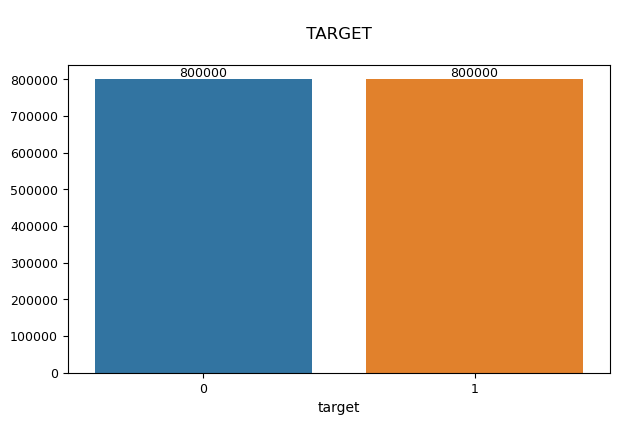

In [16]:
#Affichage de la distribution de la target
#plt.figure(figsize = (12, 6))
plt.figure(figsize = (7, 4))
bar = sns.barplot(x = df["target"].astype(int).value_counts().index, y = df["target"].astype(int).value_counts())                

plt.ylabel("")
bar.set_title("\n TARGET \n", fontsize = 12)
bar.bar_label(bar.containers[0], size = "9")
bar.tick_params(labelsize = "9")

Nous avons une <span style = "color: blue">distribution équilibrée</span> de la target.

<h3><span style = "color : darkgreen">2 - Nettoyage des données</span></h3> 

Dans ce qui suit, nous procéderons au nettoyage des données.

<h4><span style = "color :darkorange">A. Les valeurs manquantes</span></h4> 

Commençons par vérifier si nous avons des <span style = "color: blue">valeurs manquantes</span>:

In [17]:
display(df.isna().sum())
print(f"Le dataframe a {df.shape[1]} colonnes et {df.isna().sum().sum()} colonnes ont des valeurs manquantes.")

id        0
text      0
target    0
dtype: int64

Le dataframe a 3 colonnes et 0 colonnes ont des valeurs manquantes.


Nous n'avons donc **pas de valeurs manquantes**.

<h4><span style = "color : darkorange">B. Les doublons</span></h4> 

Observons maintenant la <span style = "color: blue">présence des doublons</span> dans notre dataset.

In [18]:
#Fonction permettant de vérifier les doublons par variable
def doublons(df):
    for col in df.columns:
        n = df[col].duplicated().sum()
        print(f"col : {col} -> duplicated : {n}")
        
doublons(df)

col : id -> duplicated : 1685
col : text -> duplicated : 18534
col : target -> duplicated : 1599998


Nous avons des doublons car <span style = "color: blue">l'id est unique</span> pour chaque tweet. Observons d'où cela peut venir.

In [19]:
df[df["id"].duplicated(keep = "first") == True].head()

,id,text,target
800261,1467863684,Awwh babs... you look so sad underneith that s...,1
800300,1467880442,Haven't tweeted nearly all day Posted my webs...,1
801280,1468053611,@hellobebe I also send some updates in plurk b...,1
801573,1468100580,good night swetdreamss to everyonee and jare...,1
801650,1468115720,@ientje89 aw i'm fine too thanks! yeah i miss ...,1


In [20]:
df[df["id"].duplicated(keep = "last") == True].head()

,id,text,target
213,1467863684,Awwh babs... you look so sad underneith that s...,0
275,1467880442,Haven't tweeted nearly all day Posted my webs...,0
989,1468053611,@hellobebe I also send some updates in plurk b...,0
1177,1468100580,good night swetdreamss to everyonee and jare...,0
1254,1468115720,@ientje89 aw i'm fine too thanks! yeah i miss ...,0


Nous remarquons que les tweets dupliqué proviennent d'une <span style = "color: blue">erreur lors de l'association de la target</span>. Une fois nous avons une "target $= 1$" une autre fois une "target $= 0$". Ainsi, nous allons supprimer ces doublons pour éviter les erreurs.

In [21]:
ind = [*df[df["id"].duplicated(keep = "first") == True].index, *df[df["id"].duplicated(keep = "last") == True].index]
df.drop(index = ind, inplace = True)
df.reset_index(drop = True, inplace = True)

Ainsi, nous n'avons plus de doublons.

<h4><span style = "color : darkorange">C. Les outliers</span></h4>

Nous allons observer maintenant les <span style = "color: blue">outliers</span>. Nous observerons le **nombre de caractères des tweets** afin de voir **si nous devons supprimer les tweets trop long** qui peuvent aborder plusieurs sujets.</big>

In [22]:
df["_len_text"] = df["text"].str.len()
print(f" Min = {df._len_text.min()} Max = {df._len_text.max()}")

 Min = 6 Max = 374


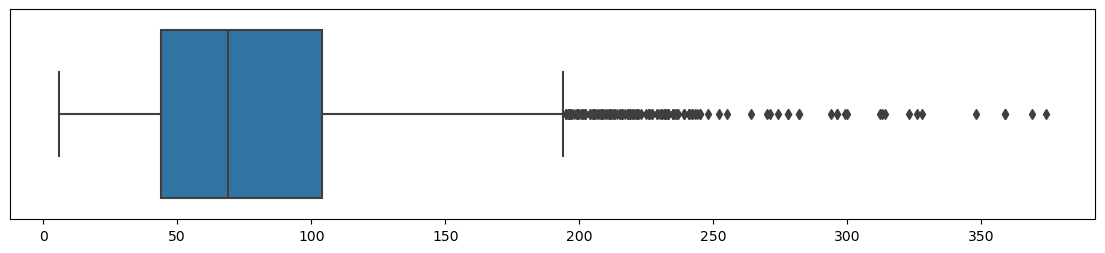

In [23]:
### Boxplot de la longueur des tweet
fig = plt.figure(figsize = (14, 6))

plt.subplot(2, 1, 1)
sns.boxplot(data = df["_len_text"], orient = "h")
plt.yticks([])

plt.show()

Supprimons les tweets de longueur supérieure à $190$.

In [24]:
df = df[df["_len_text"] <= 190].reset_index(drop = True)

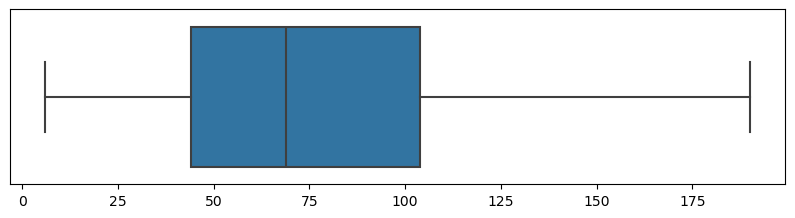

In [25]:
### Boxplot de la longueur des tweet
#fig = plt.figure(figsize = (14, 6))
fig = plt.figure(figsize = (10, 5))
plt.subplot(2, 1, 1)
sns.boxplot(data = df["_len_text"], orient = "h")
plt.yticks([])

plt.show()

Ainsi, les tweets semblent avoir une longueur correcte.

<h4><span style = "color : darkorange">D. Suppression des features</span></h4> 

Nous supprimons les variables qui ne nous interessent pas pour la suite.

In [26]:
df.drop(columns = ["id", "_len_text"], inplace = True)

Nous avons ainsi terminé le nettoyage de notre Dataframe.

---
<div class = "alert alert-block alert-info"><big><center><span style = "color : blue"><b> Text Processing & Analyse Textuelle </span></b></center></big></br>
    
<b>Le traitement de texte, ou "text processing"</b> en anglais, désigne le processus de manipulation et de traitement de données textuelles à l'aide d'algorithmes et de techniques informatiques. <b>L'analyse des données textuelles</b> est le processus d'exploration et d'interprétation de données textuelles pour en extraire des informations pertinentes. 

Les étapes du traitement et d'analyse du texte peuvent varier en fonction des objectifs spécifiques,  voici les étapes générales de ces processus:</br>

-<span style = "color : green"><u> Collecte des données textuelles</u></span></br>
La première étape consiste à rassembler les données textuelles à partir de diverses sources, telles que des documents, des bases de données, des médias sociaux, des sites web, des courriels, etc.

-<span style = "color : green"><u> Prétraitement du texte</u></span></br>

Nettoyage du texte pour éliminer les éléments indésirables, tels que les balises HTML, les caractères spéciaux, les erreurs de codage, etc.

-<span style = "color : green"><u> Tokenisation</u></span></br>

Division du texte en unités discrètes appelées "tokens", qui peuvent être des mots, des phrases ou d'autres unités, en fonction des besoins de l'analyse.

-<span style = "color : green"><u> Suppression des mots vides</u></span></br>

Élimination des mots courants et peu informatifs, tels que "et", "le", "la", "de", pour réduire la dimensionnalité des données.

-<span style = "color : green"><u> Racinisation ou Lemmatisation</u></span></br>

Transformation des mots en leur forme de base (racine ou lemme) pour regrouper les variantes d'un mot.
<b>La lemmatisation</b> est un processus de traitement du langage naturel qui consiste à réduire un mot à sa forme de base  appelée "lemme" qui représente sa racine linguistique. Par exemple, les formes verbales conjuguées comme "mange", "manges", "mangeons" sont toutes ramenées à leur lemme commun "manger". De même, les mots "chats" et "chat" sont lemmatisés en "chat", et ainsi de suite. L'objectif de la lemmatisation est de regrouper différentes formes d'un mot sous une seule forme afin de réduire la variabilité et de simplifier l'analyse textuelle.
Contrairement à <b>la racinisation (stemming)</b>, qui consiste également à réduire les mots à leur forme de base mais sans nécessairement aboutir à des formes linguistiquement correctes, la lemmatisation tente de produire des lemmes valides dans la langue en question.

-<span style = "color : green"><u> Analyse de la structure grammaticale</u></span></br>

Identification des éléments de la structure grammaticale, comme les phrases, les clauses, les verbes, les sujets, etc.

-<span style = "color : green"><u> Analyse des entités nommées</u></span></br>

Extraction des entités nommées, telles que les noms de personnes, les lieux, les dates, etc., dans le texte.

-<span style = "color : green"><u> Analyse de sentiments</u></span></br>

Évaluation des sentiments associés au texte pour déterminer s'il est positif, négatif ou neutre.

-<span style = "color : green"><u> Analyse de la fréquence des mots<u/></span></br>

Identification des mots les plus fréquents dans le texte pour comprendre les termes clés et les thèmes principaux.

-<span style = "color : green"><u> Modélisation de sujets</u></span></br>

Création de modèles de sujets pour découvrir les thèmes sous-jacents présents dans le texte.

-<span style = "color : green"><u> Classification de texte</u></span></br>

Attribution de catégories ou de labels aux documents textuels en fonction de leur contenu.

-<span style = "color : green"><u> Analyse de la séquence (le cas échéant)</u></span></br>

Si la séquence est importante (comme dans le traitement du langage naturel profond), analyse de la séquence des mots et des phrases.

-<span style = "color : green"><u> Visualisation des données textuelles</u></span></br>

Création de visualisations telles que des graphiques, des nuages de mots, des diagrammes de réseau, etc., pour représenter les informations extraites du texte.

-<span style = "color : green"><u> Interprétation des résultats</u></span></br>

Les résultats de l'analyse sont interprétés pour obtenir des informations, des tendances, des idées ou des décisions.

-<span style = "color : green"><u> Optimisation & Validation des résultats</u></span></br>

Optimisez les paramètres et les modèles d'analyse pour améliorer la qualité des résultats et réduire les erreurs.

-<span style = "color : green"><u> Rapport et présentation des résultats</u></span></br>

Les informations extraites de l'analyse textuelle sont utilisées pour prendre des décisions, générer des rapports, alimenter des systèmes de recommandation, etc.
Ces étapes générales représentent le processus typique de l'analyse des données textuelles, mais il est important de noter que la complexité et les détails spécifiques peuvent varier en fonction des besoins et des technologies utilisées pour l'analyse.</br></br>

</div>

---

<a name="C4"><h2><span style = "color : blue">II - Text Processing</span></h2></a>

<h3><span style = "color : darkgreen">1 - Sample des données</span></h3> 

Afin de réaliser le <span style = "color: blue">text processing</span> de nos données, nous commencerons par <span style = "color: blue">créer le corpus en fusionnant</span> un sample de **$10~000$ tweets positifs** et un sample de **$10~000$ tweets négatifs**. 

In [27]:
df_sample = pd.concat([df[df["target"] == 0].sample(10000, random_state = 0), #Négatif
                       df[df["target"] == 1].sample(10000, random_state = 0)], #Positif
                       ignore_index = True)

<h3><span style = "color : darkgreen">2 - Nettoyage des données</span></h3>

Nous allons effectuer le text processing à l'aide la librairie `Spacy`. Pour cela nous allons:

- Créer une <span style = "color: blue">liste d'émojis</span> permettant de **traduire**" les informations sur **l'émotion**.
- Mettre les tokens en <span style = "color: blue">minuscule</span>.
- <span style = "color: blue">Lemmatiser</span> les tokens.
- Supprimer les lettres <span style = "color: blue">présentent plus de 2 fois consécutive</span> dans le même mot.
- Supprimer les <span style = "color: blue">stop words</span>.
- Garder uniquement tokens <span style = "color: blue">constitués de lettres</span>.
- Supprimer les tokens de <span style = "color: blue">taille inférieure à 3</span>.

---
<div class="alert alert-block alert-info" background: linear-gradient(90deg, #8360c3, #2ebf91);>
    <span style="color: blue;" font-family:'Arial';">
        <h3><center> Le modèle pré-entrainé de spaCy</center></h3></span>

Le module **en_core_web_sm** est un modèle pré-entrainé de spaCy spécialement conçu pour la langue anglaise (d'où le "en" pour "English"). </br>
                                                                                                                                 **spaCy** est une bibliothèque de traitement du langage naturel (NLP) en Python et ce modèle en particulier est l'un des modèles de base fournis par spaCy pour effectuer diverses tâches de traitement du langage naturel en anglais.</br>
                                                                                                                               
Le modèle **en_core_web_sm** inclut des informations telles que des vecteurs de mots pré-entrainés, des règles grammaticales et lexicales et d'autres données utiles pour effectuer des opérations telles que la tokenisation, la reconnaissance d'entités nommées, la lemmatisation, l'analyse syntaxique, et plus encore, en anglais.</br>

L'utilisation de ce modèle pré-entrainé permet de gagner du temps et de bénéficier de performances décentes pour de nombreuses tâches de NLP en anglais sans avoir à créer un modèle personnalisé à partir de zéro. </br>
</div>

---    

In [28]:
import re
#import spacy

In [29]:
import spacy

In [30]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.2/12.8 MB 6.7 MB/s eta 0:00:02
     - -------------------------------------- 0.6/12.8 MB 7.4 MB/s eta 0:00:02
     --- ------------------------------------ 1.2/12.8 MB 9.2 MB/s eta 0:00:02
     ----- ---------------------------------- 1.9/12.8 MB 10.9 MB/s eta 0:00:02
     -------- ------------------------------- 2.7/12.8 MB 13.1 MB/s eta 0:00:01
     ----------- ---------------------------- 3.7/12.8 MB 13.8 MB/s eta 0:00:01
     -------------- ------------------------- 4.6/12.8 MB 15.5 MB/s eta 0:00:01
     ------------------ --------------------- 5.8/12.8 MB 16.8 MB/s eta 0:00:01
     --------------------- ------------------ 6.9/12.8 MB 17.6 MB/s eta 0:00:01
     ------------------------ --------------- 7.9/12.8 MB 18.1 MB/s eta 0:00:01
     ---------------------------- ----------- 9.1/12.8 MB 18.7 MB/s eta 0:00:01
     ------------------------------- ------- 10.4/1

Procédons au nettoyage de notre corpus de données.

In [31]:
import spacy
from pandarallel import pandarallel

emojis = {":)": "smile", ":-)": "smile", ":-D": "smile", ":^)": "smile", ";d": "wink", ";)": "wink", ";-)": "wink",
          ":(": "sad", ":-(": "sad", ":-<": "sad", ":'-)": "sadsmile", ":O": "surprised", ":-@": "shocked",
          ":@": "shocked", ":-$": "confused", ":-&": "confused", ":-!": "confused", "O.o": "confused", 
          ":P": 'tongue', ":#": "mute", ":X": "mute", ":-0": "yell", "$_$" : "greedy", "@@": "eyeroll",
          "xD" : "lol", "O:-)": "angel", "O*-)": "angel"}

nlp = spacy.load("en_core_web_sm")

def clean(doc, emojis, nlp):
    import re  # Importez 're' à l'intérieur de la fonction
    
    # Replace all emojis.
    for emoji in emojis.keys():
        doc = doc.replace(emoji, "emoji" + emojis[emoji])
        
    doc = doc.lower() # Minuscule
    doc = doc.replace("#", "") #Supprime le "#"
    doc = re.sub(r"(.)\1\1+", r"\1\1", doc) # Remplace quand il y a plus de deux fois consécutive la même lettre

    #Filtering our tokens
    doc = nlp(doc)
    filtered = [token.lemma_ for token in doc # Lemmatise
                if token.is_stop == False # Supprime les stopwords 
                and token.lemma_.isalpha() == True # Garde uniquement les lettres
                and len(token.lemma_) >= 3] # Garde les mots de plus de 3 caractères
    
    return " ".join(filtered)

pandarallel.initialize()
df_sample["clean_text"] = df_sample["text"].parallel_apply(clean, args=(emojis, nlp))
df_sample.head()


INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


,text,target,clean_text
0,"Just woke up, I wish I had an iphone but firs...",0,wake wish iphone webcam
1,...My mom and one of my best friends and her m...,0,mom good friend mom deciede ghost come touch y...
2,@SongzYuuup I missed Strata but I heard it wa...,0,miss strata hear zoo unfortunately late night ...
3,@DataVonTeese Yikes! Take care today! Pain dis...,0,yike care today pain distract bad drug drink hug
4,"Back from a weekend with my bf. Now, i need to...",0,weekend need focus chem


Nous avons nettoyé et prétraité le texte contenu dans la colonne `text` de notre dataframe `df_sample` en effectuant des opérations suivantes:
- La suppression d'émoticônes (Remplacement de toutes les émoticônes par leur nom correspondant (par exemple, ":)" est remplacé par "emojismile"),
- La conversion en minuscules, 
- La lemmatisation, 
- La suppression des stopwords et d'autres caractères indésirables, 
- puis stocke le résultat dans une nouvelle colonne `clean_text`.

<h3><span style = "color : darkgreen">3 - Affichage des données</span></h3> 

<h4><span style = "color : darkorange">A. Affichage des tokens</span></h4> 

Nous allons créer une fonction qui prermet d'afficher le nombre de tokens total et le nombre de tokens uniques.

In [32]:
def display_tokens_info(tokens):
    print(f"nombre de tokens : {len(tokens)}, nombre de tokens unique : {len(set(tokens))} \n")
    print(tokens[:30])

Affichons les informations sur nos tokens.

In [33]:
doc = nlp(" ".join(df_sample["clean_text"]))
tokens = [token.text for token in doc]
display_tokens_info(tokens)

nombre de tokens : 112898, nombre de tokens unique : 15519 

['wake', 'wish', 'iphone', 'webcam', 'mom', 'good', 'friend', 'mom', 'deciede', 'ghost', 'come', 'touch', 'yea', 'freaky', 'miss', 'strata', 'hear', 'zoo', 'unfortunately', 'late', 'night', 'club', 'teach', 'grader', 'mix', 'yike', 'care', 'today', 'pain', 'distract']


<h4><span style = "color : darkorange">B. Affichage WordCloud</span></h4> 

Nous allons créer deux WordCloud permettant de visualiser respectivement les mots les plus fréquents sur les tweets positifs et les tweets négatifs.

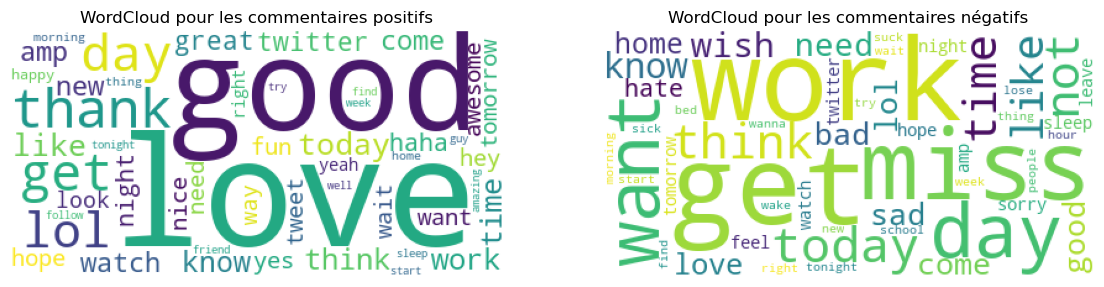

In [34]:
#Creation des corpus "positif" et "négatif"
corpus_1 = [token.text for text in df_sample["clean_text"][df_sample["target"] == 1] for token in nlp(text)]
corpus_0 = [token.text for text in df_sample["clean_text"][df_sample["target"] == 0] for token in nlp(text)]

fig = plt.figure(figsize = (14,8))

plt.subplot(2, 2, 1)
wordcloud = WordCloud(background_color = "white", stopwords = [], max_words = 50).generate(" ".join(corpus_1))
plt.axis("off")
plt.imshow(wordcloud)
plt.title("WordCloud pour les commentaires positifs")  # Titre pour ce sous-plot

plt.subplot(2, 2, 2)
wordcloud = WordCloud(background_color = "white", stopwords = [], max_words = 50).generate(" ".join(corpus_0))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("WordCloud pour les commentaires négatifs")  # Titre pour ce sous-plot

plt.show()

Voici le **Top 5 des mots** les plus fréquents dans les **tweets positifs et négatifs**.

In [35]:
print("Top 5 Positif :")
display(pd.Series(corpus_0).value_counts().head())

Top 5 Positif :


work    702
get     661
day     601
miss    594
not     563
Name: count, dtype: int64

In [36]:
print("Top 5 Negatif :")
display(pd.Series(corpus_1).value_counts().head())

Top 5 Negatif :


good     886
love     720
day      652
thank    627
get      542
Name: count, dtype: int64

  ---
<div class="alert alert-block alert-info" background: linear-gradient(90deg, #8360c3, #2ebf91);>
    <span style="color: blue;" font-family:'Arial';">
        <h3><center> L'environnement MLFlow </center></h3></span>

MLflow est une **plateforme open source** développée par Databricks pour **gérer le cycle de vie des projets** de machine learning. Elle permet de **suivre, de gérer et de déployer des modèles** de machine learning de manière efficace.  </br>
L'environnement **MLflow comprend plusieurs composants**, notamment le **suivi (tracking)**, la **gestion des expériences**, la **gestion des modèles** et le **déploiement**. </br>

**Le suivi (tracking)** dans MLflow est la composante qui permet de **suivre les expérimentations et les itérations de développement de modèles**. Voici les **différentes étapes du traitement du suivi** dans MLflow:</br>
                                                    
  1. <u>Installation de MLflow</u>: Avant de commencer, vous devez installer MLflow sur votre système,</br>                                                
  2. <u>Création d'une expérience</u>: Une expérience est un conteneur logique pour un ensemble d'exécutions de modèle. Vous pouvez créer une expérience pour chaque projet ou chaque objectif de modèle.</br>
                                                    
  3. <u>Définir un contexte d'exécution</u>: Pour suivre Votre code, utilisez le contexte d'exécution de MLflow. Cela se fait généralement en utilisant **with mlflow.start_run()** dans un code Python,</br>
                                                    
  4. <u>Suivi des métriques</u>: L'utilisation de **mlflow.log_metric()** permet d'enregistrer des métriques telles que la précision, le rappel, l'erreur quadratique moyenne, etc. </br> 
                                                    
  5. <u> Suivi des paramètres</u>: l'utilisation de **mlflow.log_param()** permet d'enregistrer les paramètres de notre modèle ou de notre expérience.</br> 
   
  6. <u> Enregistrement des modèles</u>: Vous pouvez enregistrer vos modèles formés avec MLflow en utilisant **mlflow.pytorch.save_model()** ou d'autres fonctions d'enregistrement de modèle pertinentes pour votre bibliothèque de machine learning.</br>

  7. <u>Visualisation Des résultats</u>: Vous pouvez visualiser les résultats de vos expériences en utilisant **l'interface utilisateur Web** de MLflow. Vous pouvez exécuter **mlflow ui** pour lancer l'interface utilisateur.</br>

  8. <u>Comparaison des expériences</u>: MLflow **permet de comparer les différentes expériences** et leurs résultats, ce qui vous aide à sélectionner le meilleur modèle ou à prendre des décisions basées sur les métriques et les paramètres enregistrés.

  9. <u>Déploiement de modèles (facultatif)</u>: Une fois que vous avez sélectionné un modèle, vous pouvez le déployer dans un environnement de production en utilisant les fonctionnalités de déploiement de modèle de MLflow.</br>

  10. <u>Gestion des versions</u>: MLflow prend en charge la gestion des versions des modèles, ce qui signifie que vous pouvez suivre l'évolution de vos modèles au fil du temps.</br>

Le suivi avec MLflow **permet de garder une trace complète de vos expériences** de machine learning, ce qui facilite la gestion et la reproductibilité de vos projets.
                                                                                               
</div>

---  

## <div class="alert alert-block alert-info"><a name="C5"><center> Partie 2 - Préparation de l'environnement MLFlow</a></center></div>

Nous allons créer un <span style = "color: blue">environnement MLFlow</span> permettant le <span style = "color: blue">**tracking**</span> lors de l’entraînement des modèles. Le <span style = "color: blue">stockage des données</span> de tracking se fera de manière <span style = "color: blue">locale</span> dans des répertoires.
    
Nous allons créer une fonction pour le <span style = "color: blue">tracking de données</span> qui sera appelée lors de chaque entraînement de modèles. Nous aurons ainsi:

- Le tracking des <span style = "color: blue">Hyperparamètres</span>
- Le tracking des <span style = "color: blue">temps de traitement de fit</span> et de <span style = "color: blue">prédiction</span>
- Le tracking des <span style = "color: blue">scores</span>
- Le stockage de <span style = "color: blue">graphiques</span>
- Le stockage des <span style = "color: blue">modèles</span>

Nous allons <span style = "color: blue">visualiser</span> et <span style = "color: blue">comparer</span> nos données via l’UI de MLFlow.

<a name="C6"><h2><span style = "color : blue">I - Tracking et Stockage</span></h2></a>

Nous allons commencer par le tracking de <span style = "color: blue">deux métriques</span>:
    
- <span style = "color: blue">L'accuracy</span> afin d'étudier la précision du modèle,
- <span style = "color: blue">La ROC AUC</span> une métrique de classification commune. L'AUC est l'aire sous la courbe ROC qui représente le taux de vrais positifs par rapport au taux de faux positifs,

Nous allons ensuite réaliser le <span style = "color: blue">tracking des hyperparamètres</span> et des <span style = "color: blue">temps de traitements</span> spécifiques à chaque modèle.

Enfin nous stockerons les graphiques tel que la <span style = "color: blue">ROC curve</span> et <span style = "color: blue">la matrice de confusion</span>. Nous ajouterons également les <span style = "color: blue">History plot</span> pour les **modèles de deep learning**.

<a name="C7"><h2><span style = "color : blue">II - Fonctions de Tracking</span></h2></a>

Nous allons créer les fonctions qui réalisent les points évoqués ci-dessus.

In [37]:
import mlflow
Model_simples = mlflow.create_experiment("model_simples")
Model_avances = mlflow.create_experiment("model_avances")

</br>Ces ligne de code créent 2 nouvelles expériences (experiment) dans MLflow avec les noms `model_simples3` & `model_avances3` . Une expérience est une sorte de conteneur qui nous permet d'organiser les runs de modèles liés à notre projet ou à un objectif particulier. </br></br>
Ici, nous avons créé une expérience appelée `model_simples3` pour **suivre les runs** de **modèles simples** et  une autre expérience appelée `model_avances3` qui sera utilisée pour **suivre les runs** de **modèles plus avancés** ou complexes.</br>

<h3><span style = "color : darkgreen">1 - Modèles sur mesure simple</span></h3>

Nous allons créer la focntion `MLFlow_tracking_simple()` qui prend en entrée un modèle d'apprentissage automatique (model), un nom de modèle (name) et une option test (par défaut à False). Voici ce que fait notre fonction:</br>

- Vérifie la valeur de l'argument test: Si test est vrai, elle utilise les données de test (X_test et y_test) pour évaluer le modèle. Sinon, elle utilise les données de validation (X_valid et y_valid).

- Configure l'enregistrement des expériences MLflow en utilisant `mlflow.set_experiment` **avec l'identifiant** de l'expérience `Model_simples`.

- Démarre une nouvelle exécution `MLflow avec mlflow.start_run` en utilisant le nom passé en argument.

- Enregistre les hyperparamètres du modèle en utilisant `mlflow.log_param` parcourant le dictionnaire renvoyé par `model.get_params()`.

- Mesure le temps nécessaire pour ajuster le modèle en **enregistrant la durée d'exécution de la méthode fit** du modèle.

- Mesure le temps nécessaire pour effectuer des prédictions avec le modèle en **enregistrant la durée d'exécution de la méthode predict** sur les données spécifiques (X_2).

- Enregistre des métriques telles que l'exactitude (Accuracy) et le score ROC AUC (ROC_AUC_Score) en utilisant `mlflow.log_metric`.

- Enregistre le modèle formé en utilisant `mlflow.sklearn.log_model`.

- Génère un graphique matplotlib qui comprend 2 sous-graphiques:

    - Une **matrice de confusion** (heatmap) pour **évaluer les performances** du modèle.
    - Une **courbe ROC** (Receiver Operating Characteristic) pour **évaluer la performance du modèle** en termes de taux de faux positifs et de taux de vrais positifs.

- Enregistre ce graphique en tant qu'artefact MLflow à l'aide de `mlflow.log_artifact`.

- Affiche le **rapport de classification** (classification_report), le **score ROC AUC** et **l'exactitude du modèle**.


Voici ci-dessous la fonction qui concerne les **Modèles sur mesure simple**.

In [38]:
def MLFlow_tracking_simple(model, name, test = False): 
    
    #Validation set ou Test set
    if test == True:
        X_2 = X_test
        y_2 = y_test
    else: 
        X_2 = X_valid
        y_2 = y_valid
        
    ### Modèle MLFlow ###
    mlflow.set_experiment(experiment_id = Model_simples)
    with mlflow.start_run(run_name = name):
        
        #Tracking des hyperparams 
        for key, value in model.get_params().items():
            mlflow.log_param(key, value)  
        
        #Modèle fit + Tracking du temps 
        start_fit = time.time() 
        model.fit(X_train, y_train)
        mlflow.log_param("Time_fit", time.time() - start_fit)
        
        #Modèle Pred + Tracking du temps 
        start_pred = time.time() 
        y_pred = model.predict(X_2)
        mlflow.log_param("Time_pred", time.time() - start_pred)

        #Tracking des métriques
        mlflow.log_metric("Accuracy", accuracy_score(y_2, y_pred))
        mlflow.log_metric("ROC_AUC_Score", roc_auc_score(y_2, model.predict(X_2)))

        mlflow.sklearn.log_model(model, name)
    
        ### Affichage ###
        plt.figure(figsize = (14, 6))

        #Création Matrice de Confusion 
        cf_matrix = confusion_matrix(y_2, y_pred)
        pourcent = [f"{round(value, 2)}%" for value in cf_matrix.flatten() / np.sum(cf_matrix) * 100]
        labels = [f"{X}\n{Y}" for X, Y in zip(["True_Neg", "False_Pos", "False_Neg", "True_Pos"], pourcent)]
    
        #Affichage Matrice de Confusion 
        plt.subplot(1, 2, 1)
        sns.heatmap(cf_matrix, annot = np.asarray(labels).reshape(2,2), cmap = 'Blues', fmt = "",
                    xticklabels = ["Negative","Positive"], yticklabels = ["Negative","Positive"])
    
        plt.title ("Matrice de confusion", fontdict = {"size" : 18})
        plt.xlabel("Valeurs prédites", fontdict = {"size" : 14})
        plt.ylabel("Vraies valeurs"   , fontdict = {"size" : 14})
    
        #Affichage ROC AUC
        plt.subplot(1, 2, 2)
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_2, y_pred)
        plt.plot(false_positive_rate, true_positive_rate, color = "red", label = "AUC = %0.2f" % auc(false_positive_rate, true_positive_rate))
        plt.plot([0,1], [0,1], linestyle ="--")
    
        plt.legend(loc = "lower right")
        plt.title("Receiver Operation Characteristic", fontdict = {"size" : 18})
        plt.ylabel("True Positive Rate", fontdict = {"size" : 14})
        plt.xlabel("False Positive Rate", fontdict = {"size" : 14})

        plt.savefig("mlflowtracking/Matrice_confusion_ROC_AUC.png")
        mlflow.log_artifact("mlflowtracking/Matrice_confusion_ROC_AUC.png")
        plt.show()
    
        print(classification_report(y_2, y_pred, zero_division = 0))
        print(f"ROC_AUC_SCORE : {roc_auc_score(y_2, y_pred)}")
        print(f"Accuracy : {accuracy_score(y_2, y_pred)}")

</br>La fonction ci-dessus effectue un **suivi complet des performances d'un modèle** d'apprentissage automatique en utilisant MLflow, en **enregistrant les hyperparamètres, les métriques, le temps d'exécution**, et en **générant des visualisations** pour évaluer le modèle. </br></br>
Elle sera utile pour **comparer** nos différents modèles et **leurs performances**.

<h3><span style = "color : darkgreen">2 - Modèles sur mesure avancés</span></h3>

Nous allons définir la fonction `tunning()` pour **l'optimisation du nombre d'epochs** lors de l'entraînement d'un modèle d'apprentissage automatique. La fonction prend plusieurs arguments en entrée:

- **model**: Le modèle d'apprentissage automatique que nous souhaiterions entraîner.
- **X_train_padded**: Les données d'entraînement (caractéristiques) au format "padded" (généralement des séquences de texte avec un même nombre de tokens, où les tokens sont remplis ou tronqués au besoin).
- **X_valid_padded**: Les données de validation (caractéristiques) au format "padded".
- **y_train** : Les étiquettes de classe correspondantes pour les données d'entraînement.
- **y_valid** : Les étiquettes de classe correspondantes pour les données de validation.
</br></br>
La fonction configure le modèle en utilisant la méthode `compile()`en spécifiant l'optimiseur `rmsprop`, la fonction de perte `binary_crossentropy` et les métriques à suivre pendant l'entraînement `accuracy`.
</br></br>
L'entrainementt du modèle s'effectue en 10 epochs avec une taille de lot de 128 en utilisant les données d'entraînement (X_train_padded et y_train) et les données de validation (X_valid_padded et y_valid). Il se fait en mode silencieux (verbose = 0), ce qui signifie qu'aucune sortie ne sera affichée pendant l'entraînement.</br>

Après l'entraînement, la fonction détermine le nombre optimal d'epochs en inspectant l'historique de l'entraînement. Elle récupère l'indice de la valeur maximale de la métrique de validation ("val_accuracy"). Cela suppose que le modèle atteint son meilleur résultat sur les données de validation à un certain nombre d'epochs. Enfin, la fonction **retourne le nombre optimal d'epochs** calculée.</br></br>
Voici à quoi resemble notre fonction d'optimisation du choix du nombre d'epochs.</br>

In [39]:
#Optimisation du nombre d'epochs def tunning(model, X_train_padded, X_valid_padded, y_train, y_valid):
def tunning(model, X_train_padded, X_valid_padded, y_train, y_valid):    
    model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])
    history = model.fit(X_train_padded, y_train, epochs = 10, batch_size = 128, 
                        validation_data = (X_valid_padded, y_valid), verbose = 0)
   
    #optimisation epochs
    epochs = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1
    return epochs

</br> L'objectif principal de l'utilisation d'epochs est de **permettre au modèle d'apprendre progressivement** à partir des données d'entraînement, en ajustant ses paramètres à chaque epoch pour s'approcher de la meilleure performance possible sur les données de validation ou de test. </br>

Le nombre optimal d'epochs peut varier en fonction du problème, de l'architecture du modèle et de la taille de l'ensemble de données, et il doit souvent être déterminé par expérimentation. Trop peu d'epochs peuvent entraîner un sous-apprentissage (underfitting), tandis que trop d'epochs peuvent entraîner un surapprentissage.</br>

Nous allons créé notre fonction `MLFlow_tracking_avance()`qui effectue les tâches suivantes:</br>

- **Configuration de l'expérience** MLflow en utilisant `mlflow.set_experiment` avec l'identifiant de l'expérience `Model_avances` puis démarre une nouvelle exécution MLflow avec `mlflow.start_run` en utilisant le nom passé en argument.</br>

- **Auto-enregistrement TensorFlow** en utilisant `mlflow.tensorflow.autolog()` pour activer l'enregistrement automatique des métriques et des paramètres TensorFlow.</br>

- **Compilation du modèle** en utilisant l'optimiseur `rmsprop` la fonction de perte `binary_crossentropy` et la métrique `accuracy`.</br>

- **Entraînement du modèle** en utilisant les données d'entraînement (X_train_padded et y_train). Le temps d'entraînement est enregistré avec mlflow.log_param.</br>

- **Prédiction sur l'ensemble de test**: Après l'entraînement, la fonction effectue des prédictions sur l'ensemble de test (X_test_padded) et mesure le temps nécessaire pour effectuer ces prédictions. Les prédictions sont ensuite modifiées pour considérer un seuil de décision de 0,5, c'est-à-dire que les valeurs inférieures ou égales à 0,5 sont arrondies à 0, et les valeurs supérieures à 0,5 sont arrondies à 1.</br>

- **Affichage des résultats**: La fonction génère un certain nombre de visualisations pour évaluer le modèle, notamment: La matrice de confusion (heatmap), la courbe ROC (Receiver Operating Characteristic), le graphique d'historique d'entraînement (précision et perte), l'Enregistrement des artefacts MLflow et l'affichage des métriques sur l'ensemble de test.</br></br>

Voici ci-dessous à quoi ressemble notre fonction pour les **Modèles sur mesure avancés**.</br>

In [40]:
def MLFlow_tracking_avance(model, epochs, name, X_train_padded, X_valid_padded, X_test_padded, y_train, y_valid, y_test): 
    
    ### Modèle MLFlow ###
    mlflow.set_experiment(experiment_id = Model_avances)
    with mlflow.start_run(run_name = name):
        mlflow.tensorflow.autolog()
        model.summary()
        model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])
        
        #Modèle fit + Tracking du temps 
        start_fit = time.time() 
        history = model.fit(X_train_padded, y_train, epochs = epochs, batch_size = 128,
                            validation_data = (X_valid_padded, y_valid))
        mlflow.log_param("Time_fit", time.time() - start_fit)
        
        #Modèle Pred + Tracking du temps 
        start_pred = time.time() 
        y_pred = model.predict(X_test_padded)
        mlflow.log_param("Time_pred", time.time() - start_pred)
        
        y_pred[y_pred <= 0.5] = 0.
        y_pred[y_pred > 0.5] = 1.
        mlflow.tensorflow.autolog(disable = True)
        
        ### Affichage ###
        plt.figure(figsize = (14, 6))

        #Création Matrice de Confusion 
        cf_matrix = confusion_matrix(y_test, y_pred)
        pourcent = [f"{round(value, 2)}%" for value in cf_matrix.flatten() / np.sum(cf_matrix) * 100]
        labels = [f"{X}\n{Y}" for X, Y in zip(["True_Neg", "False_Pos", "False_Neg", "True_Pos"], pourcent)]
    
        #Affichage Matrice de Confusion 
        plt.subplot(1, 2, 1)
        sns.heatmap(cf_matrix, annot = np.asarray(labels).reshape(2,2), cmap = 'Blues', fmt = "",
                    xticklabels = ["Negative","Positive"], yticklabels = ["Negative","Positive"])
    
        plt.title ("Matrice de confusion", fontdict = {"size" : 18})
        plt.xlabel("Valeurs prédites", fontdict = {"size" : 14})
        plt.ylabel("Vraies valeurs"   , fontdict = {"size" : 14})
    
        #Affichage ROC AUC
        plt.subplot(1, 2, 2)
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
        plt.plot(false_positive_rate, true_positive_rate, color = "red", label = "AUC = %0.2f" % auc(false_positive_rate, true_positive_rate))
        plt.plot([0,1], [0,1], linestyle ="--")
    
        plt.legend(loc = "lower right")
        plt.title("Receiver Operation Characteristic", fontdict = {"size" : 18})
        plt.ylabel("True Positive Rate", fontdict = {"size" : 14})
        plt.xlabel("False Positive Rate", fontdict = {"size" : 14})

        plt.savefig("mlflowtracking/Matrice_confusion_ROC_AUC.png")
        mlflow.log_artifact("mlflowtracking/Matrice_confusion_ROC_AUC.png")
        plt.show()
    
        ### Graphique History ###
        show_history(history)
        plot_history(history, path = "mlflowtracking/Accuracy_&_Loss.png")
        plt.savefig("mlflowtracking/History.png")
        mlflow.log_artifact("mlflowtracking/History.png")
        plt.close()
        
        #Métriques sur le test set
        print(classification_report(y_test, y_pred, zero_division = 0))
        print(f"ROC_AUC_SCORE : {roc_auc_score(y_test, y_pred)}")
        print(f"Accuracy : {accuracy_score(y_test, y_pred)}")

</br> Notre fonction effectue une évaluation complète d'un modèle de ML, enregistrant ses performances et ses visualisations dans `MLflow` et en **générant des métriques** pour l'ensemble de test.</br>
Elle sera utile pour **suivre, visualiser et évaluer** les modèles de machine learning dans un pipeline MLflow.</br>

## <div class="alert alert-block alert-info"><a name="C8"><center> Partie 3 - Elaboration des Modèles sur mesure simple</a></center></div>

Dans cette partie, nous allons découper notre dataframe en <span style = "color: blue">3 sets</span>. Puis, nous crérons un <span style = "color: blue">bag of words</span> pondéré par <span style = "color: blue">TF-IDF</span> qui nous permettra de créer des <span style = "color: blue">modèles de machine learning</span>. Enfin, nous allons comparer nos modèles afin <span style = "color: blue">d'optimiser les hyperparamètres</span> du plus performant.

<a name="C9"><h2><span style = "color : blue">I - Séparation des données</span></h2></a>

Nous allons tout d'abord séparer nos données en 3 sets:

- <span style = "color: blue">Train set</span>: Est utilisé pour <span style = "color: blue"> l’entraînement</span>des données.
- <span style = "color: blue">Validation set</span>: Est utilisé pour <span style = "color: blue">mesurer les scores</span> des modèles et de les <span style = "color: blue">comparer</span> pour les <span style = "color: blue">améliorer</span>.
- <span style = "color: blue">Test set</span>: Est utilisé pour <span style = "color: blue">réaliser un contrôle final</span>. Il permet de <span style = "color: blue">s’assurer d’un score similaire</span> sur ce set qui n’est à aucun moment intervenu dans l’élaboration ou le choix du modèle.

In [41]:
X = np.array(df_sample["clean_text"])
y = np.array(df_sample["target"])

X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, y, train_size = 0.8, random_state = 0)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size = 0.5, random_state = 0)

print(f"X_train : {X_train.shape} y_train : {y_train.shape}")
print(f"X_valid : {X_valid.shape} y_valid : {y_valid.shape}")
print(f"X_test : {X_test.shape} y_test : {y_test.shape}")

X_train : (16000,) y_train : (16000,)
X_valid : (2000,) y_valid : (2000,)
X_test : (2000,) y_test : (2000,)


<a name="C10"><h2><span style = "color : blue">II - Création du bag of words pondéré par TF-IDF</span></h2></a>

Nous allons créer un <span style = "color: blue"> bag of words pondéré par TF-IDF</span> pour obtenir les features à utiliser pour nos modèles.

In [42]:
vectoriser = TfidfVectorizer()

X_train = vectoriser.fit_transform(X_train)
X_valid = vectoriser.transform(X_valid)
X_test = vectoriser.transform(X_test)

<a name="C11"><h2><span style = "color : blue">III - Création des premiers modèles sur mesures simples</span></h2></a>

Nous allons utiliser les <span style = "color: blue">modèles d'apprentissage supervisé</span> suivants pour effectuer une <span style = "color: blue">classification binaire</span>:

- Un <span style = "color: blue">Dummy Classifier</span>,
- Une <span style = "color: blue">SVM</span>,
- Une <span style = "color: blue">Regression logistique</span>,
- Une Naive Bayes : <span style = "color: blue">BernouilliNB</span>.

Pour évaluer le modèle, nous créons la <span style = "color: blue">matrice de confusion</span> puis nous utilisons les <span style = "color: blue">mesures de classification</span> afin d’obtenir une <span style = "color: blue">meilleure évaluation de la qualité du modèle</span>. Nous supposons la stabilité de nos résultats à $\pm 2\%$. Nous feront une étude de stabilité seulement sur notre modèle final car ce n'est pas le but du projet.

<h3><span style = "color : darkgreen">1 - Dummy Classifier</span></h3>

Nous allons créer une baseline avec un Dummy Classifier.

C:\Users\kfaiz\anaconda3\envs\Projet_7_Thierry_Test2\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


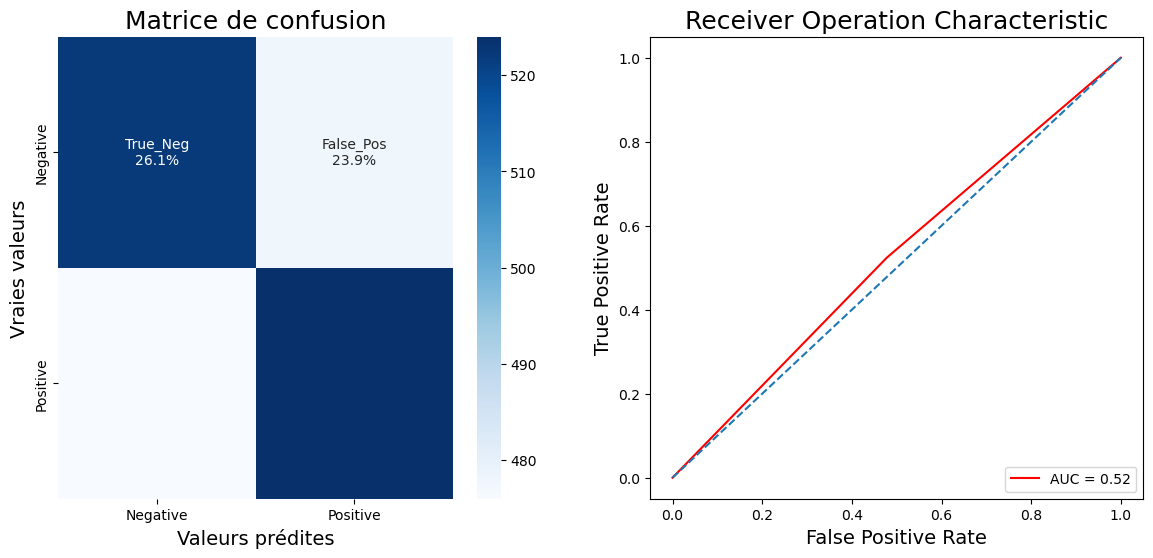

              precision    recall  f1-score   support

           0       0.52      0.52      0.52      1000
           1       0.52      0.52      0.52      1000

    accuracy                           0.52      2000
   macro avg       0.52      0.52      0.52      2000
weighted avg       0.52      0.52      0.52      2000

ROC_AUC_SCORE : 0.523
Accuracy : 0.523


In [43]:
DC = DummyClassifier(strategy = "stratified", random_state = 0)
MLFlow_tracking_simple(DC, "Dummy")

Nous avons donc une baseline avec une `accuracy` et un `ROC_AUC_Score` $\approx 52.3\%$.

-**Precision (Précision)**: La précision est le **nombre de prédictions correctes** pour une classe donnée (dans ce cas, la classe 0 ou la classe 1) divisé par le **nombre total de prédictions positives** pour cette classe. Pour la classe 0, la précision est de 0,52, ce qui **signifie que 52 % des prédictions positives pour la classe 0 sont correctes**. De même, la précision pour la classe 1 est également de 0,52.

-**Recall (Rappel)** : Le rappel est le **nombre de prédictions correctes** pour une classe donnée **divisé par le nombre total d'exemples réels** de cette classe. Pour la classe 0, le rappel est de 0,52, ce qui **signifie que 52 % des exemples réels de la classe 0 ont été correctement identifiés**. De même, le rappel pour la classe 1 est également de 0,52.

-**F1-score**: Le score F1 est une **métrique qui combine à la fois la précision et le rappel en une seule valeur**. Il est calculé comme une moyenne harmonique des deux. Le F1-score est de 0,52 pour les deux classes, ce qui signifie que le modèle a une performance équilibrée en termes de précision et de rappel pour les deux classes.

-**Support**: Le support est le **nombre d'exemples réels de chaque classe dans l'ensemble de données**. Il y a 1000 exemples de chaque classe dans cet ensemble de données.

-**Accuracy (Exactitude)**: L'exactitude est **la proportion totale de prédictions correctes par rapport au nombre total d'exemples**. Dans ce cas, l'exactitude est de 0,523, soit environ 52,3 %.

-**Macro Avg (Moyenne macro)**: C'est la **moyenne des valeurs de précision, de rappel et de F1-score** pour chaque classe. Dans ce cas, elle est de 0,52.

-**Weighted Avg (Moyenne pondérée)**: C'est la **moyenne des valeurs de précision, de rappel et de F1-score** pour chaque classe, pondérée par le support de chaque classe. Dans ce cas, elle est également de 0,52.

-**ROC_AUC_SCORE**: Le score ROC AUC est une **métrique qui mesure la capacité du modèle à classer correctement** les exemples positifs par rapport aux exemples négatifs. Un score de 0,523 indique une performance relativement faible.

-**Accuracy (Exactitude)**: Il s'agit de la **proportion totale de prédictions correctes**, qui est de 0,523 (environ 52,3 %), ce qui signifie que le modèle DummyClassifier a une performance assez basique et équilibrée, prédisant essentiellement au hasard.

<h3><span style = "color : darkgreen">2 - Support Vector Machines</span></h3>

Nous allons créer une SVM.

C:\Users\kfaiz\anaconda3\envs\Projet_7_Thierry_Test2\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


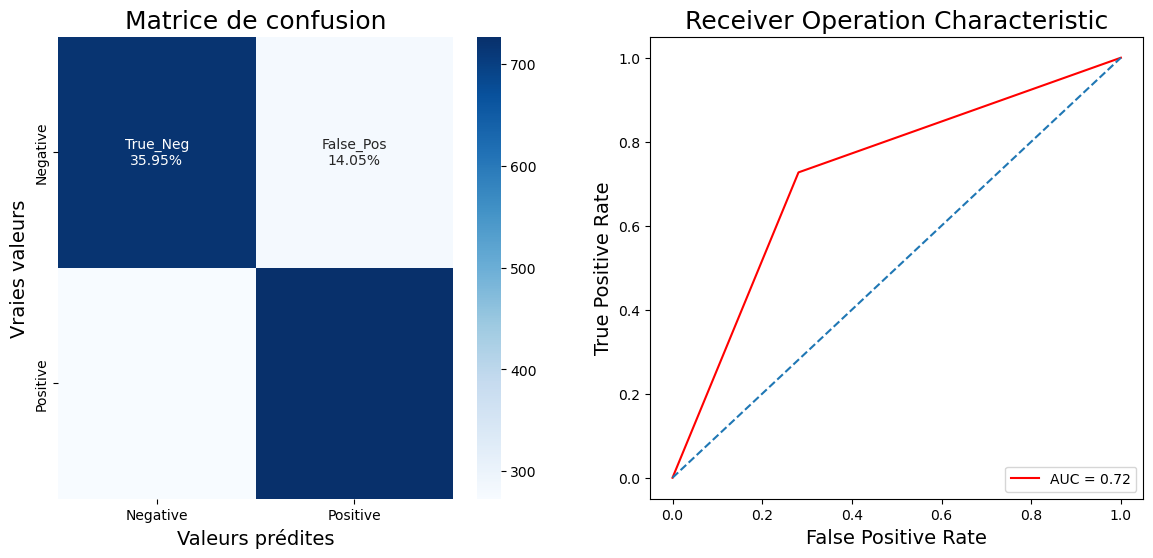

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1000
           1       0.72      0.73      0.72      1000

    accuracy                           0.72      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.72      0.72      0.72      2000

ROC_AUC_SCORE : 0.723
Accuracy : 0.723


In [44]:
MLFlow_tracking_simple(LinearSVC(), "SVM")

Nous avons une `accuracy` et un `ROC_AUC_Score` $\approx 72,65\%$.

<h3><span style = "color : darkgreen">3 - Logictic regression</span></h3>

Nous allons créer une régression logistique.

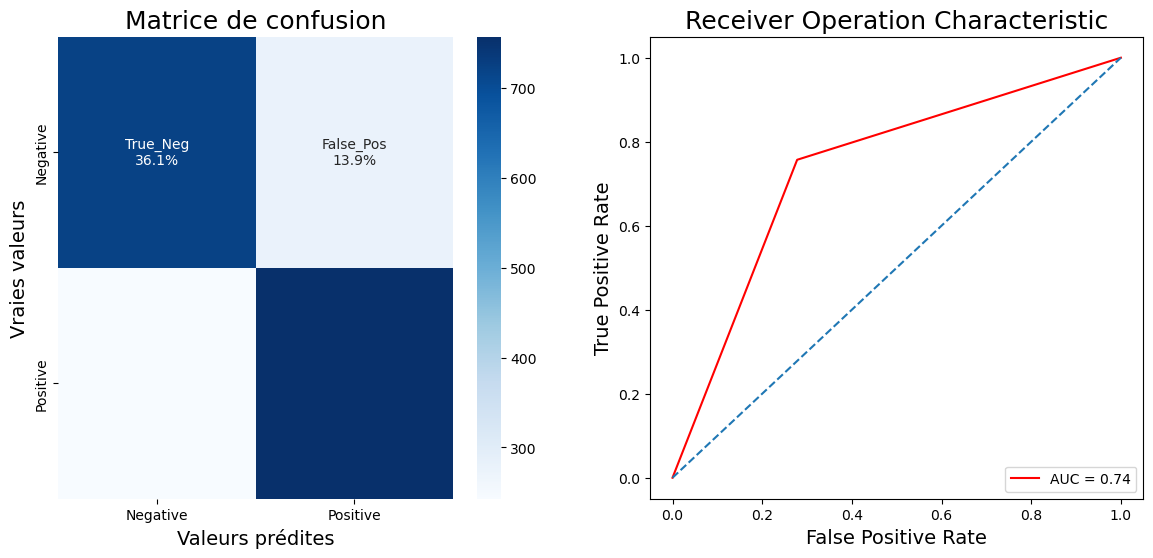

              precision    recall  f1-score   support

           0       0.75      0.72      0.73      1000
           1       0.73      0.76      0.74      1000

    accuracy                           0.74      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.74      0.74      0.74      2000

ROC_AUC_SCORE : 0.7395
Accuracy : 0.7395


In [45]:
MLFlow_tracking_simple(LogisticRegression(), "LR")

Nous avons une `accuracy` et un `ROC_AUC_Score`$\approx 74.2\%$.

<h3><span style = "color : darkgreen">4 - Naive Bayes</span></h3>

Nous allons créer un Bernoulli Naive Bayes utilisé pour les données discrètes, où les entités sont sous forme binaire.

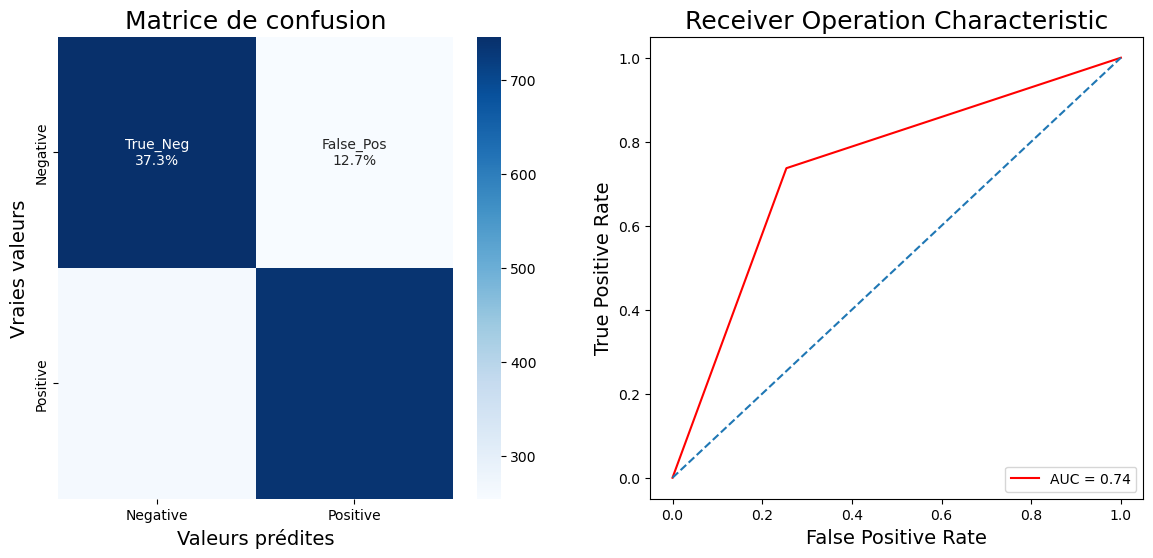

              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1000
           1       0.74      0.74      0.74      1000

    accuracy                           0.74      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.74      0.74      0.74      2000

ROC_AUC_SCORE : 0.7415
Accuracy : 0.7415


In [46]:
MLFlow_tracking_simple(BernoulliNB(), "Bernouilli")

Nous avons une `accuracy` et un `ROC_AUC_Score` $\approx 74.25\%$.

<h3><span style = "color : darkgreen">5 - Résumé des modèles via MLflow</span></h3>

Nous avons créé quatres modèles, voici les résultats obtenus:
    
- <span style = "color: blue">Dummy Classifier</span> $\approx 52.3 \%$,
- <span style = "color: blue">SVM</span> $\approx 72.65 \%$,
- <span style = "color: blue">Regression logistique</span> $\approx 74.2 \%$,
- <span style = "color: blue">BernouilliNB</span> $\approx 74.25 \%$.

Voici un récapitulatif des résultats obtenus avec l'UI de MLFlow:


|                      | <big>Dummy</big>   | <big>SVM<big>     | <big>LR<big>       | <big>Bernouilli<big>  |
|----------------------|--------------------|-------------------|--------------------|-----------------------|
| <big>Time_fit</big>  | <big>0.00114</big> | <big>0.049</big>  | <big>0.108</big>   | <big>0.0063</big>     |
| <big>Time_pred</big> | <big>0.0007</big>  | <big>0.0003</big> | <big>0.00023</big> | <big>0.00117</big>    |
| <big>Accuracy</big>  | <big>52,3%</big>   | <big>72,65%</big> | <big>74,2%</big>   | <big>74,25%</big>     |
| <big>ROC_AUC</big>   | <big>52,3%</big>   | <big>72,65%</big> | <big>74,2%</big>   | <big>74,25%</big>     |

Le meilleur modèle que nous avons entraîné est le <span style = "color: blue">BernouilliNB</span> avec une accuracy de $74.25\%$ qui est aussi rapide lors du fit et de la prédiction. Nous allons garder ce modèle et essayer de l'optimiser.

<a name="C12"><h2><span style = "color : blue">IV - Optimisation du meilleur Modèle</span></h2></a>

<h3><span style = "color : darkgreen">1 - Grid Search</span></h3>

Le Grid Search avec une validation croisée à 10 (CV = 10) est une **technique d'optimisation d'hyperparamètres** couramment utilisée dans l'apprentissage automatique pour **rechercher les meilleures combinaisons d'hyperparamètres d'un modèle**. Cette technique **permet d'explorer** de manière systématique **un espace d'hyperparamètres prédéfini en évaluant le modèle sur plusieurs ensembles de données de validation** (ou "folds") générés à partir de l'ensemble de données d'entraînement.</br>

Nous allons utiliser une Grid Search avec une `CV = 10` afin d'optimiser nos hyperparamètres. 

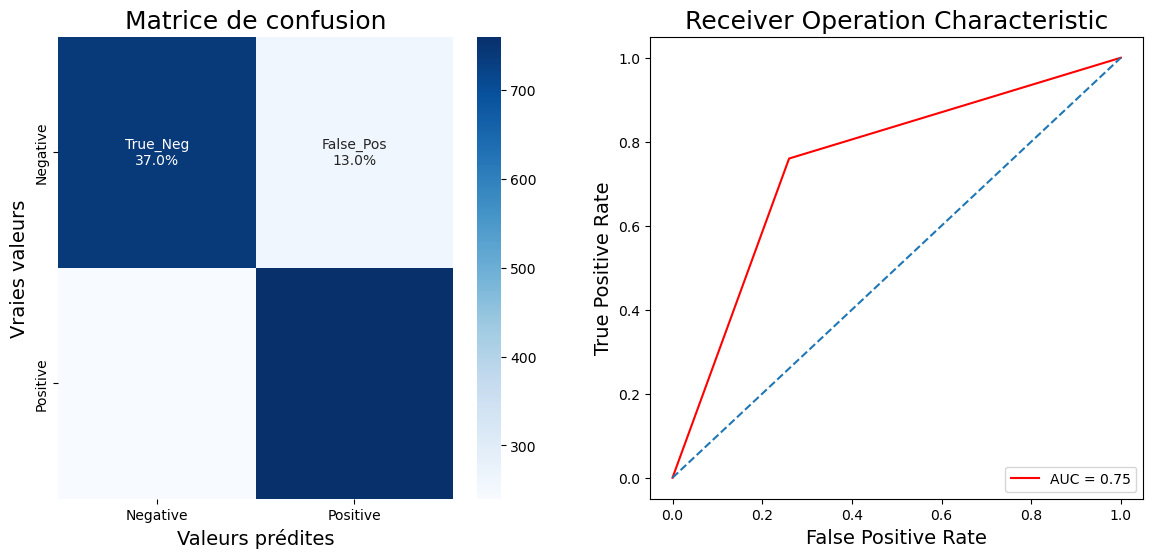

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1000
           1       0.75      0.76      0.75      1000

    accuracy                           0.75      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.75      0.75      0.75      2000

ROC_AUC_SCORE : 0.75
Accuracy : 0.75


In [47]:
#GridSearch
grid = GridSearchCV(BernoulliNB(),
                    {"alpha" : np.arange(0.1, 10.1, 0.1)},
                    cv = 10,
                    n_jobs = -1,
                    scoring = "accuracy")
grid.fit(X_train, y_train)

#Modèle
MLFlow_tracking_simple(BernoulliNB(**grid.best_params_), "Bernouilli_optimisé")

Nous avons une `accuracy` et un `ROC_AUC_Score` $= 75.1\%$. L'accuracy du modèle de BernouilliNB s'est donc améliorée avec l'optimisation Grid Search (initilalement égale à 74.25%).

<h3><span style = "color : darkgreen">2 - Test du modèle final</span></h3>

Nous allons maintenant tester notre modèle optimisé sur notre test set.

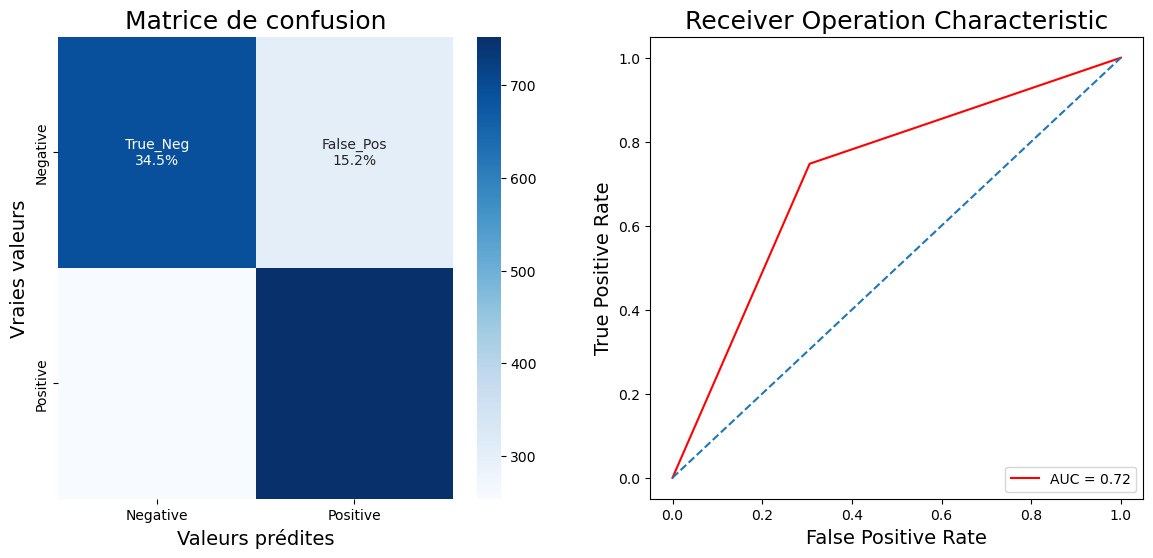

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       994
           1       0.71      0.75      0.73      1006

    accuracy                           0.72      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.72      0.72      0.72      2000

ROC_AUC_SCORE : 0.7208399502382086
Accuracy : 0.721


In [48]:
MLFlow_tracking_simple(BernoulliNB(**grid.best_params_), "Bernouilli_optimisé_test", test = True)

Nous avons une `accuracy` et un `ROC_AUC_Score` $\approx 72.2 \%$.

<h3><span style = "color : darkgreen">3 - Stabilité du modèle final</span></h3>

La fonction ci-dessous **effectue une évaluation de la stabilité des performances** d'un modèle d'apprentissage automatique en divisant les données en ensembles d'entraînement, de validation et de test à plusieurs reprises avec différentes initialisations aléatoires, puis en calculant l'exactitude et le score ROC AUC à chaque itération. Cela peut aider à **évaluer la robustesse du modèle par rapport aux variations dans les données d'entraînement et de validation**.</br>

Testons la stabilité du modèle grâce à la fonction suivante:

In [49]:
def stabilite(df, model, test = True):
    
    X = np.array(df["clean_text"])
    y = np.array(df["target"])
    df_1 = pd.DataFrame()
    
    for i in range(0, 10):
        
        #SPLIT
        X_tr, X_v_t, y_tr, y_v_t = train_test_split(X, y, train_size = 0.8, random_state = i)
        X_v, X_t, y_v, y_t = train_test_split(X_v_t, y_v_t, test_size = 0.5, random_state = i)

        #TF-IDF
        vectoriser = TfidfVectorizer()
        X_tr = vectoriser.fit_transform(X_tr)
        X_v = vectoriser.transform(X_v)
        X_t = vectoriser.transform(X_t)

        #Valid ou Test
        if test == True:
            x = X_t
            Y = y_t
        else:
            x = X_v
            Y = y_v
    
        # PREDICT
        model.fit(X_tr, y_tr)
        y_pred = model.predict(x)
        df_2 = pd.DataFrame([[accuracy_score(Y, y_pred), roc_auc_score(Y, model.predict(x))]])
        df_1 = pd.concat([df_1, df_2], ignore_index = True)
    df_1.columns = ["Accuracy", "ROC_AUC"]
    display(df_1.T)

In [50]:
stabilite(df_sample, BernoulliNB(**grid.best_params_))

,0,1,2,3,4,5,6,7,8,9
Accuracy,0.72100,0.732000,0.726,0.719500,0.742000,0.726000,0.727000,0.733500,0.729500,0.733500
ROC_AUC,0.72084,0.732603,0.726,0.719397,0.741755,0.726104,0.725719,0.735619,0.730196,0.733562


Notre modèle est stable, nous avons des valeurs comprise entre $ \approx 72\%$ et $\approx 74\%$.

## <div class="alert alert-block alert-info"><a name="C13"><center> Partie 4 - Elaboration des Modèles sur mesure avancés</a></center></div>

Le but de cette partie est de créer <span style = "color: blue">des modèles de Deep Learning</span> pour essayer d'avoir une meilleure précision que nos modèles précédents.

Nous allons tester deux modèles:

- Un <span style = "color: blue">modèle classique</span> avec une couche `d'Embedding` et des couches `Denses` (fully-connected).
- Un <span style = "color: blue">modèle avec une couche LSTM</span> entre une couche `d'Embedding` et une couche `Dense`.

Nous allons procéder à des simulations selon deux techniques de pré-traitement: une <span style = "color: blue">lemmatization</span> et un <span style = "color: blue">stemming</span> afin de choisir la technique pour la suite des simulations.

Nous utiliserons sur le meilleur des deux modèles, deux approches de <span style = "color: blue">Word Embedding</span>, `Word2Vec` et `Glove` pour tenter d'améliorer les performances. Nous réaliserons des tests sur le même sample du dataset que l’approche classique afin de comparer les résultats. Puis, sur un jeu de données plus important.

Nous terminerons par la création d’un <span style = "color: blue">modèle BERT</span>, nous utiliserons directement un modèle <span style = "color: blue">Hugging Face</span> de type `TFBertForSequenceClassification`.

<a name="C14"><h2><span style = "color : blue">I - Choix du modèle</span></h2></a>

Nous allons tester les deux modèles vu précédement pour voir lequel nous allons choisir.

<h3><span style = "color : darkgreen">1 - Création des séquences</span></h3>

Commençons par la séparer nos données et créer des séquences.

In [51]:
X = np.array(df_sample["text"])
y = np.array(df_sample["target"])

X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, y, train_size = 0.8, random_state = 0)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size = 0.5, random_state = 0)

print(f"X_train : {X_train.shape} y_train : {y_train.shape}")
print(f"X_valid : {X_valid.shape} y_valid : {y_valid.shape}")
print(f"X_test : {X_test.shape} y_test : {y_test.shape}")

X_train : (16000,) y_train : (16000,)
X_valid : (2000,) y_valid : (2000,)
X_test : (2000,) y_test : (2000,)


In [52]:
#import tensorflow as tf
from keras.preprocessing.text import Tokenizer

In [53]:
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(X)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train_sequences, maxlen = 50, padding = "post", truncating = "post")

X_valid_sequences = tokenizer.texts_to_sequences(X_valid)
X_valid_padded = pad_sequences(X_valid_sequences, maxlen = 50, padding = "post", truncating = "post")

X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences, maxlen = 50, padding = "post", truncating = "post")

Ainsi, nous obtenons des matrices de séquences d'entiers X_train_padded, X_valid_padded et X_test_padded qui sont prêtes à être utilisées comme entrées pour un modèle d'apprentissage automatique, généralement un modèle de réseaux de neurones.

<h3><span style = "color : darkgreen">2 - Modèle Dense</span></h3>

Nous allons créer le modèle Dense, il contient:

- 1 couche <span style = "color: blue">Embedding</span>
- 1 couche <span style = "color: blue">Flatten</span>
- 3 couches <span style = "color: blue">Dense</span>

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

In [55]:
# Model 1 : Embedding + Flattent + Dense
def model_Dense(nom, vocab_size, embedding_dim, length):
    model = Sequential([
        Embedding(vocab_size, embedding_dim, input_length = length), #3D Array
        Flatten(), #Aplatit le vecteur 3D d'embeddings en un vecteur 2D
        Dense(16, activation = "relu"),
        Dense(16, activation = "relu"),
        Dense(1, activation = "sigmoid")], #classificateur
        name = nom) 

    return model

La fonction **model_Dense()** crée un modèle de réseau de neurones séquentiel (Sequential) pour le traitement de texte avec les couches suivantes:<br>

- **Embedding**: Cette couche crée des plongements (embeddings) pour les mots. Elle prend en entrée un vocabulaire de taille **vocab_size** où chaque mot est représenté par un entier unique. La couche d'embedding convertit ces entiers en vecteurs de **embedding_dim** dimensions. La longueur d'entrée est définie comme **input_length**.<br>

- **Flatten**: Cette couche aplatit le vecteur 3D d'embeddings en un vecteur 2D. Elle est généralement utilisée pour transformer les représentations en 2D qui peuvent être connectées à des couches de neurones entièrement connectées.<br>

- **Dense (x3)**: Il y a trois couches denses dans ce modèle, chacune avec 16 neurones. Les couches utilisent la **fonction d'activation ReLU (Rectified Linear Unit)** pour introduire de la non-linéarité. La dernière couche dense **a un seul neurone** avec une **fonction d'activation sigmoid**, ce qui suggère que ce modèle est utilisé pour la classification binaire (pour la classification binaire de texte).<br>

La fonction **model_Dense()** retourne le modèle construit.

In [56]:
epochs =  tunning(model_Dense("Dense_Baseline", 10000, 50, 50), X_train_padded, X_valid_padded, y_train, y_valid)

La fonction **tunning()** prend en entrée un modèle **model**, les **données d'entraînement (X_train_padded, y_train)** et les **données de validation (X_valid_padded, y_valid)**. <br>
Elle compile le modèle avec **l'optimiseur "rmsprop"** et la **fonction de perte "binary_crossentropy"**. Ensuite, elle entraîne le modèle sur les données d'entraînement pendant 10 époques (epochs = 10). <br>
Finalement, elle **retourne le nombre optimal d'époques** basé sur la précision maximale atteinte sur les données de validation.<br>

Ci-dessous la fonction **MLFlow_tracking_avance()** est appelée avec notre modèle, le nombre optimal d'époques (epochs), un nom pour le run ("Dense_Baseline"), ainsi que les données d'entraînement, de validation et de test (X_train_padded, X_valid_padded, X_test_padded, y_train, y_valid, y_test).<br>

La fonction **MLFlow_tracking_avance() effectue un suivi complet** de l'entraînement, de l'évaluation et de l'analyse des performances du modèle en utilisant MLflow.

Model: "Dense_Baseline"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 50)            500000    
                                                                 
 flatten_1 (Flatten)         (None, 2500)              0         
                                                                 
 dense_3 (Dense)             (None, 16)                40016     
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 540,305
Trainable params: 540,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
125/125 [===========================

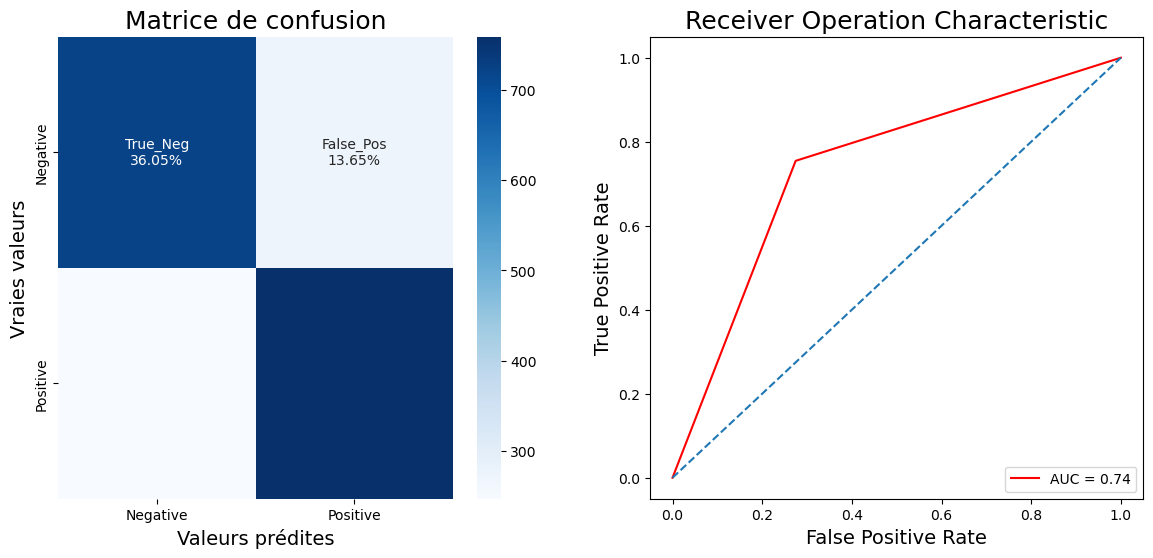

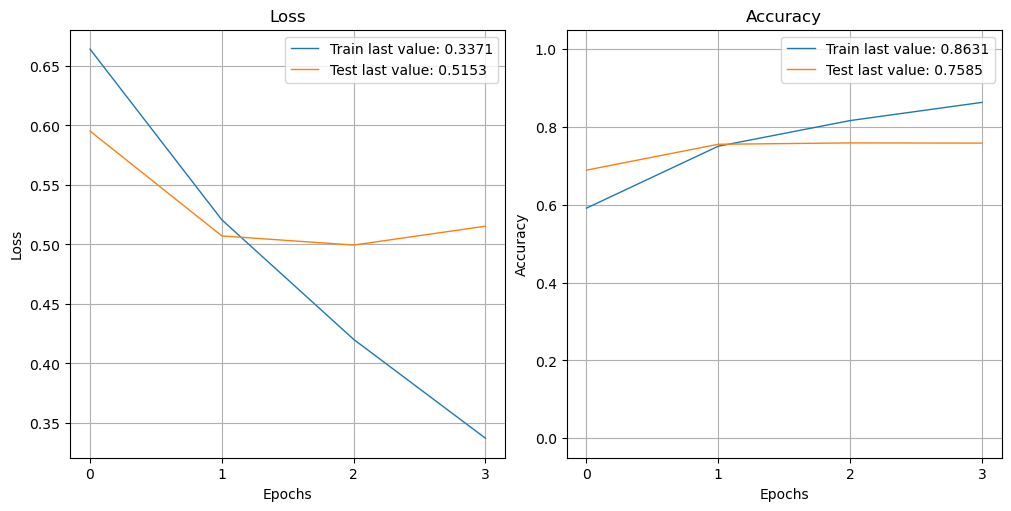

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       994
           1       0.74      0.75      0.74      1006

    accuracy                           0.74      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.74      0.74      0.74      2000

ROC_AUC_SCORE : 0.7399126368549267
Accuracy : 0.74


In [57]:
MLFlow_tracking_avance(model_Dense("Dense_Baseline", 10000, 50, 50), epochs, "Dense_Baseline",
                       X_train_padded, X_valid_padded, X_test_padded, y_train, y_valid, y_test)

Nous avons une `accuracy` et un `ROC_AUC_Score` sur le test set $\approx 74.40 \%$.

<h3><span style = "color : darkgreen">3 - Modèle LSTM</span></h3>

Nous allons créer le modèle LSTM, il contient:

- 1 couche <span style = "color: #7F00FF">Embedding</span>
- 1 couche <span style = "color: #7F00FF">LSTM Bidirectional</span>
- 1 couche <span style = "color: #7F00FF">Dense</span>

In [58]:
from tensorflow.keras.layers import Bidirectional, LSTM, Embedding, Dense
from tensorflow.keras.models import Sequential


# Modèle 2 : Embedding + BD LSTM + Dense
def model_LSTM(nom, vocab_size, embedding_dim, length):
    model = Sequential([
        Embedding(vocab_size, embedding_dim, input_length = length),
        Bidirectional(LSTM(32, dropout = 0.5)),
        Dense(1, activation = "sigmoid")],
        name = nom)

    return model

La fonction **model_LSTM()** crée un modèle de **réseau de neurones séquentiel** pour le traitement de séquences textuelles en utilisant des **couches de réseaux récurrents LSTM (Long Short-Term Memory)**. Notre modèle comprend les composants suivants:<br>

- **Embedding**: Cette couche d'embedding est utilisée pour convertir les entiers en vecteurs de plongement (embeddings). Elle prend en entrée un vocabulaire de taille vocab_size et crée des embeddings de dimension embedding_dim pour chaque mot. La longueur d'entrée est spécifiée comme length.<br>

- **Bidirectional(LSTM(32, dropout=0.5))**: Cette couche est un LSTM bidirectionnel avec 32 unités LSTM dans chaque direction. L'utilisation d'une LSTM bidirectionnelle permet au modèle d'apprendre des dépendances dans les deux sens (passé et futur) des séquences. Le paramètre **dropout est configuré à 0.5**, ce qui signifie que 50 % des neurones sont désactivés aléatoirement pendant l'entraînement pour éviter le surapprentissage.<br>

- **Dense(1, activation="sigmoid")**: Cette couche dense a un seul neurone de sortie avec une **fonction d'activation sigmoïde**. La fonction sigmoïde est couramment utilisée pour la classification binaire où la sortie du modèle est interprétée comme une probabilité d'appartenance à la classe positive.<br>

La fonction **model_LSTM()** retourne le modèle construit. Ce modèle est adapté pour des tâches de classification binaire de séquences textuelles où il peut apprendre des représentations de mots grâce à l'embedding, puis modéliser des dépendances temporelles complexes grâce à la couche LSTM bidirectionnelle, avant de faire une prédiction binaire à l'aide de la couche Dense avec activation sigmoïde.<br>

Model: "LSTM_Baseline"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 50)            500000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               21248     
 l)                                                              
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 521,313
Trainable params: 521,313
Non-trainable params: 0
_________________________________________________________________
Epoch 1/6
125/125 [==============================] - 13s 60ms/step - loss: 0.3402 - accuracy: 0.8526 - val_loss: 0.5116 - val_accuracy: 0.7630
Epoch 2/6
125/125 [==============================] - 6s 52ms/step - loss: 0.3294 - accuracy: 0.8562 - 

INFO:tensorflow:Assets written to: C:\Users\kfaiz\AppData\Local\Temp\tmp_zjbg0il\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kfaiz\AppData\Local\Temp\tmp_zjbg0il\model\data\model\assets


63/63 [==============================] - 1s 11ms/step


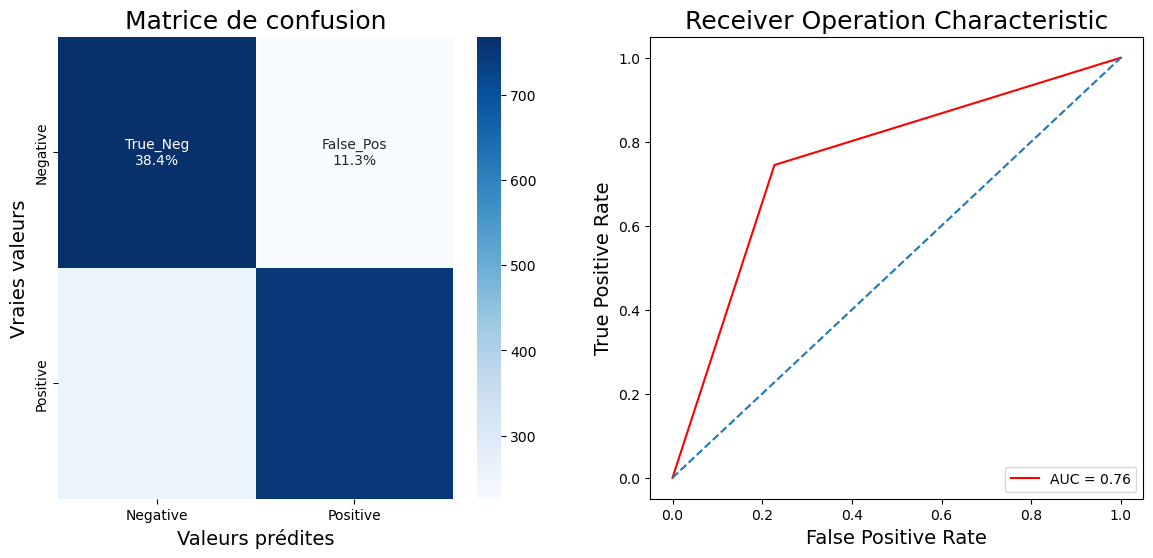

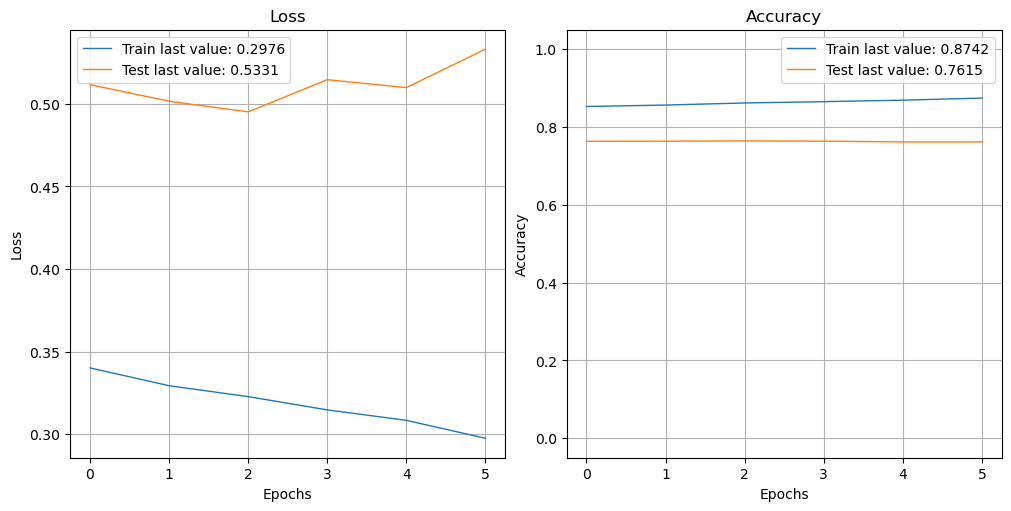

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       994
           1       0.77      0.74      0.76      1006

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000

ROC_AUC_SCORE : 0.7585843090351253
Accuracy : 0.7585


In [59]:
#MODEL
model_LSTM_Baseline = model_LSTM("LSTM_Baseline", 10000, 50, 50)
epochs = tunning(model_LSTM_Baseline, X_train_padded, X_valid_padded, y_train, y_valid)
MLFlow_tracking_avance(model_LSTM_Baseline, epochs, "LSTM_Baseline",
                       X_train_padded, X_valid_padded, X_test_padded, y_train, y_valid, y_test)

In [60]:
# Enregistrement de mon model
model_LSTM_Baseline.save("LSTM_Baseline_Model_Final_Sentiment_Analysis")

INFO:tensorflow:Assets written to: LSTM_Baseline_Model_Final_Sentiment_Analysis\assets


INFO:tensorflow:Assets written to: LSTM_Baseline_Model_Final_Sentiment_Analysis\assets


In [61]:
#epochs = tunning(model_LSTM("LSTM_Baseline", 10000, 50, 50), X_train_padded, X_valid_padded, y_train, y_valid)

In [62]:
#MLFlow_tracking_avance(model_LSTM("LSTM_Baseline", 10000, 50, 50), epochs, "LSTM_Baseline",
 #                      X_train_padded, X_valid_padded, X_test_padded, y_train, y_valid, y_test)

Nous avons une `accuracy` et un `ROC_AUC_Score` sur le test set $\approx 75.60\%$.

Nous sélectionnons le <span style = "color: blue">modèle LSTM</span> qui nous donne de meilleurs résultats.

---
<div class="alert alert-block alert-info" background: linear-gradient(90deg, #8360c3, #2ebf91);>
    <span style="color: blue;" font-family:'Arial';">
        <h3><center> Méthodes de Prétraitement: Lemmatisation Vs Stemmatisation  </center></h3></span>
                                                    
La lemmatisation et la stemmatisation sont deux techniques de traitement du langage naturel (NLP) utilisées pour réduire les mots à leur forme de base (ou forme canonique) afin de simplifier l'analyse de textes. Cependant, elles diffèrent dans la manière dont elles atteignent cet objectif et dans la précision de la réduction des mots.</br>

- <u><b>Stemmatisation</u></b>:

La stemmatisation est un processus plus simple et plus rapide que la lemmatisation. Elle se base sur des règles heuristiques pour tronquer les mots en supprimant les suffixes. Le résultat est une forme tronquée du mot, appelée "stem".
Les stems ne sont pas toujours des mots valides et ne sont pas nécessairement sémantiquement équivalents. Par exemple, le stem d'un mot peut ne pas être compréhensible en lui-même.</br>

Exemple : Le stem de "jumps", "jumped", et "jumping" est "jump". Cependant, "jump" n'est pas un mot complet dans ce cas.</br>

- <u><b>Lemmatisation</u></b>:

La lemmatisation est un processus plus sophistiqué qui réduit les mots à leur forme canonique ou base lexicale, appelée "lemme". Cette forme est généralement un mot valide et sémantiquement équivalente à la forme de base du mot.
La lemmatisation repose sur une connaissance approfondie de la langue et utilise des dictionnaires ou des modèles linguistiques pour effectuer la réduction des mots.</br>

Exemple : Le lemme de "jumps", "jumped", et "jumping" est "jump", ce qui est un mot complet et sémantiquement équivalent.</br></br>
                                                                

En résumé, la principale différence réside dans la précision et la complexité. La stemmatisation est plus rapide mais moins précise, tandis que la lemmatisation est plus précise mais peut être plus lente en raison de la nécessité d'utiliser des informations linguistiques plus détaillées. Le choix entre la lemmatisation et la stemmatisation dépend de l'application et de la précision requise dans le contexte du traitement de texte.</br></div>
                                                                
---

<a name="C15"><h2><span style = "color : blue">II - Choix de la méthode de pré-traitement</span></h2></a>

Nous allons appliquer une <span style = "color: blue">Lemmatisation</span> et une <span style = "color: blue">Stematisation</span> à nos données afin de sélectionner celle qui permet d'améliorer le mieux nos résultats. Effectuons le pré-traitement sur notre dataframe.

In [63]:
df_sample.head()

,text,target,clean_text
0,"Just woke up, I wish I had an iphone but firs...",0,wake wish iphone webcam
1,...My mom and one of my best friends and her m...,0,mom good friend mom deciede ghost come touch y...
2,@SongzYuuup I missed Strata but I heard it wa...,0,miss strata hear zoo unfortunately late night ...
3,@DataVonTeese Yikes! Take care today! Pain dis...,0,yike care today pain distract bad drug drink hug
4,"Back from a weekend with my bf. Now, i need to...",0,weekend need focus chem


Le code ci-dessous effectue la lemmatisation et la racinisation des textes dans la colonne `text` du DataFrame `df_sample` en utilisant `Spacy` et `NLTK`, puis stocke les résultats dans les colonnes `text_lem` et `text_stem` respectivement. 
Ces opérations sont effectuées de manière parallèle grâce à Pandarallel, ce qui peut accélérer le traitement si vous avez un grand volume de données

In [64]:
# Initialize Pandarallel
#pandarallel.initialize(nb_workers=1)

# Charge un modèle Spacy pré-entraîné pour le traitement du langage naturel en anglais (en_core_web_sm) dans l'objet nlp.
import spacy
nlp = spacy.load("en_core_web_sm")



# Crée un objet PorterStemmer de NLTK pour la racinisation des mots.
stemmer = PorterStemmer()

In [65]:
# Création d'une nouvelle colonne "text_lem" dans df_sample
df_sample["text_lem"] = ""

# Parcours de chaque ligne du DataFrame df_sample
for index, row in df_sample.iterrows():
    # Récupération du texte de la colonne "text" pour la ligne en cours
    text = row["text"]
    
    # Analyse du texte avec spaCy pour obtenir un objet "doc"
    doc = nlp(text)
    
    # Création d'une liste de lemmes à partir des tokens du "doc"
    lemmas = [token.lemma_ for token in doc]
    
    # Joindre les lemmes pour créer une chaîne de texte lemmatisée
    lemmatized_text = " ".join(lemmas)
    
    # Assigner le résultat à la colonne "text_lem" pour cette ligne
    df_sample.at[index, "text_lem"] = lemmatized_text


In [66]:
df_sample.head()

,text,target,clean_text,text_lem
0,"Just woke up, I wish I had an iphone but firs...",0,wake wish iphone webcam,"just wake up , I wish I have an iphone but f..."
1,...My mom and one of my best friends and her m...,0,mom good friend mom deciede ghost come touch y...,... my mom and one of my good friend and her m...
2,@SongzYuuup I missed Strata but I heard it wa...,0,miss strata hear zoo unfortunately late night ...,@songzyuuup I miss Strata but I hear it be a...
3,@DataVonTeese Yikes! Take care today! Pain dis...,0,yike care today pain distract bad drug drink hug,@datavonteese Yikes ! take care today ! pain d...
4,"Back from a weekend with my bf. Now, i need to...",0,weekend need focus chem,"back from a weekend with my bf . now , I need ..."


In [67]:
# Création d'une nouvelle colonne "text_stem" dans df_sample
df_sample["text_stem"] = ""

# Parcours de chaque ligne du DataFrame df_sample
for index, row in df_sample.iterrows():
    # Récupération du texte de la colonne "text" pour la ligne en cours
    text = row["text"]
    
    # Analyse du texte avec spaCy pour obtenir un objet "doc"
    doc = nlp(text)
    
    # Création d'une liste de tokens racinisés à l'aide du stemmer de Porter
    stemmed_tokens = [stemmer.stem(token.text) for token in doc]
    
    # Joindre les tokens racinisés pour créer une chaîne de texte racinisé
    stemmed_text = " ".join(stemmed_tokens)
    
    # Assigner le résultat à la colonne "text_stem" pour cette ligne
    df_sample.at[index, "text_stem"] = stemmed_text


In [68]:
df_sample.head()

,text,target,clean_text,text_lem,text_stem
0,"Just woke up, I wish I had an iphone but firs...",0,wake wish iphone webcam,"just wake up , I wish I have an iphone but f...","just woke up , i wish i had an iphon but fir..."
1,...My mom and one of my best friends and her m...,0,mom good friend mom deciede ghost come touch y...,... my mom and one of my good friend and her m...,... my mom and one of my best friend and her m...
2,@SongzYuuup I missed Strata but I heard it wa...,0,miss strata hear zoo unfortunately late night ...,@songzyuuup I miss Strata but I hear it be a...,@songzyuuup i miss strata but i heard it wa ...
3,@DataVonTeese Yikes! Take care today! Pain dis...,0,yike care today pain distract bad drug drink hug,@datavonteese Yikes ! take care today ! pain d...,@datavontees yike ! take care today ! pain dis...
4,"Back from a weekend with my bf. Now, i need to...",0,weekend need focus chem,"back from a weekend with my bf . now , I need ...","back from a weekend with my bf . now , i need ..."


Nous allons sauvegarder notre jeu de données dans un fichier CSV.

In [69]:
df_sample.to_csv('CSV/df_sample.csv', index = False)
#df_sample.to_csv('df_sample.csv', index = False)

Nous créons une fonction `sequences` qui permet de créer les séquences:

In [70]:
def sequences(X, y, max_len):
    
    X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, y, train_size = 0.8, random_state = 0)
    X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size = 0.5, random_state = 0)

    tokenizer = Tokenizer(num_words = 10000)
    tokenizer.fit_on_texts(X)

    X_train_sequences = tokenizer.texts_to_sequences(X_train)
    X_train_padded = pad_sequences(X_train_sequences, maxlen = max_len, padding = "post", truncating = "post")

    X_valid_sequences = tokenizer.texts_to_sequences(X_valid)
    X_valid_padded = pad_sequences(X_valid_sequences, maxlen = max_len, padding = "post", truncating = "post")
    
    X_test_sequences = tokenizer.texts_to_sequences(X_test)
    X_test_padded = pad_sequences(X_test_sequences, maxlen = max_len, padding = "post", truncating = "post")

    return X_train_padded, X_valid_padded, X_test_padded

Nous allons créer des séquences:

In [71]:
X_train_padded_lem, X_valid_padded_lem, X_test_padded_lem = sequences(np.array(df_sample["text_lem"]),
                                                                      np.array(df_sample["target"]),
                                                                      50)

X_train_padded_stem, X_valid_padded_stem, X_test_padded_stem = sequences(np.array(df_sample["text_stem"]),
                                                                         np.array(df_sample["target"]),
                                                                         50)

la fonction sequences retourne les données d'entraînement, de validation et de test sous forme de séquences rembourrées.</br>

Le code utilise cette fonction deux fois, une fois pour les données lemmatisées (X_train_padded_lem, X_valid_padded_lem, X_test_padded_lem) et une fois pour les données stemmatisées (X_train_padded_stem, X_valid_padded_stem, X_test_padded_stem), en spécifiant une longueur maximale de 50 mots.</br> 

Ces données prétraitées seront utilisées pour entraîner des modèles d'apprentissage automatique, en particulier pour le traitement de texte.</br>

<h3><span style = "color : darkgreen">1 - Lemmatisation</span></h3>

Testons notre modèle avec une Lemmatisation en prétraitement:

Model: "LSTM_lem"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 50)            500000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               21248     
 nal)                                                            
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 521,313
Trainable params: 521,313
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
  5/125 [>.............................] - ETA: 5s - loss: 0.3518 - accuracy: 0.8500WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0461s vs `on_train_batch_end` time: 0.1674s). Chec

125/125 [==============================] - 12s 62ms/step - loss: 0.3677 - accuracy: 0.8387 - val_loss: 0.4847 - val_accuracy: 0.7680
Epoch 2/5
125/125 [==============================] - 7s 56ms/step - loss: 0.3571 - accuracy: 0.8447 - val_loss: 0.5019 - val_accuracy: 0.7680
Epoch 3/5
125/125 [==============================] - 7s 57ms/step - loss: 0.3517 - accuracy: 0.8487 - val_loss: 0.5062 - val_accuracy: 0.7650
Epoch 4/5
125/125 [==============================] - 7s 55ms/step - loss: 0.3458 - accuracy: 0.8500 - val_loss: 0.5214 - val_accuracy: 0.7635
Epoch 5/5
1/1 [==============================] - 1s 1s/step


INFO:tensorflow:Assets written to: C:\Users\kfaiz\AppData\Local\Temp\tmpkqa_6ax1\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kfaiz\AppData\Local\Temp\tmpkqa_6ax1\model\data\model\assets


63/63 [==============================] - 1s 13ms/step


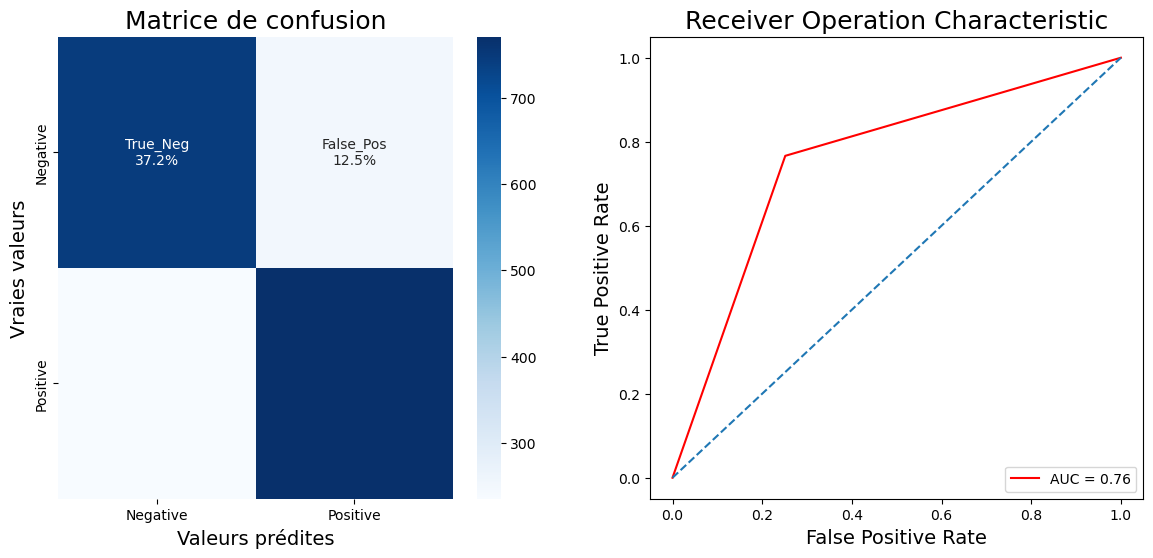

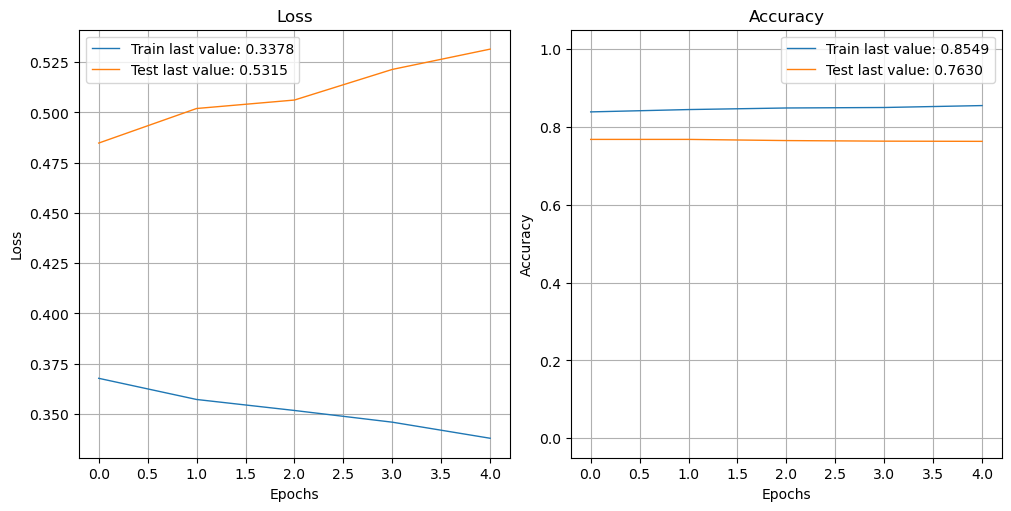

              precision    recall  f1-score   support

           0       0.76      0.75      0.75       994
           1       0.76      0.77      0.76      1006

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000

ROC_AUC_SCORE : 0.7574462680656504
Accuracy : 0.7575


In [72]:
#MODEL
model_LSTM_lem = model_LSTM("LSTM_lem", 10000, 50, 50)
epochs = tunning(model_LSTM_lem, X_train_padded_lem, X_valid_padded_lem, y_train, y_valid)
MLFlow_tracking_avance(model_LSTM_lem, epochs, "LSTM_lem",
                       X_train_padded_lem, X_valid_padded_lem, X_test_padded_lem, y_train, y_valid, y_test)

In [73]:
# Enregistrement de mon model
model_LSTM_lem.save("LSTM_lem_Model_Final_Sentiment_Analysis")

INFO:tensorflow:Assets written to: LSTM_lem_Model_Final_Sentiment_Analysis\assets


INFO:tensorflow:Assets written to: LSTM_lem_Model_Final_Sentiment_Analysis\assets


Nous avons une `accuracy` et un `ROC_AUC_Score` sur le test set $\approx 75.55 \%$.

<h3><span style = "color : darkgreen">2 - Stematisation</span></h3>

Testons notre modèle avec une Stematisation en prétraitement.

Model: "LSTM_stem"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 50)            500000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               21248     
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 521,313
Trainable params: 521,313
Non-trainable params: 0
_________________________________________________________________
Epoch 1/7
  6/125 [>.............................] - ETA: 6s - loss: 0.2993 - accuracy: 0.8724WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0526s vs `on_train_batch_end` time: 0.3905s). Che

125/125 [==============================] - 16s 67ms/step - loss: 0.3546 - accuracy: 0.8476 - val_loss: 0.4944 - val_accuracy: 0.7725
Epoch 2/7
125/125 [==============================] - 7s 56ms/step - loss: 0.3454 - accuracy: 0.8507 - val_loss: 0.5023 - val_accuracy: 0.7715
Epoch 3/7
125/125 [==============================] - 7s 60ms/step - loss: 0.3382 - accuracy: 0.8576 - val_loss: 0.5047 - val_accuracy: 0.7715
Epoch 4/7
125/125 [==============================] - 7s 57ms/step - loss: 0.3295 - accuracy: 0.8606 - val_loss: 0.5047 - val_accuracy: 0.7705
Epoch 5/7
125/125 [==============================] - 7s 60ms/step - loss: 0.3260 - accuracy: 0.8627 - val_loss: 0.5070 - val_accuracy: 0.7710
Epoch 6/7
125/125 [==============================] - 7s 58ms/step - loss: 0.3167 - accuracy: 0.8663 - val_loss: 0.5133 - val_accuracy: 0.7680
Epoch 7/7
1/1 [==============================] - 1s 1s/step


INFO:tensorflow:Assets written to: C:\Users\kfaiz\AppData\Local\Temp\tmpz0qjpe6n\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kfaiz\AppData\Local\Temp\tmpz0qjpe6n\model\data\model\assets


63/63 [==============================] - 1s 14ms/step


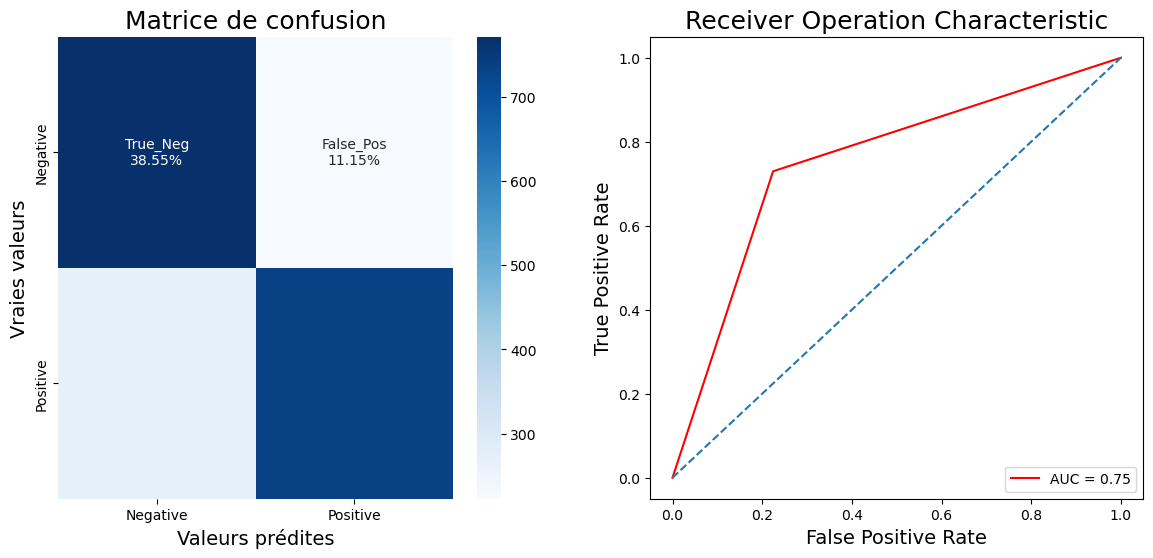

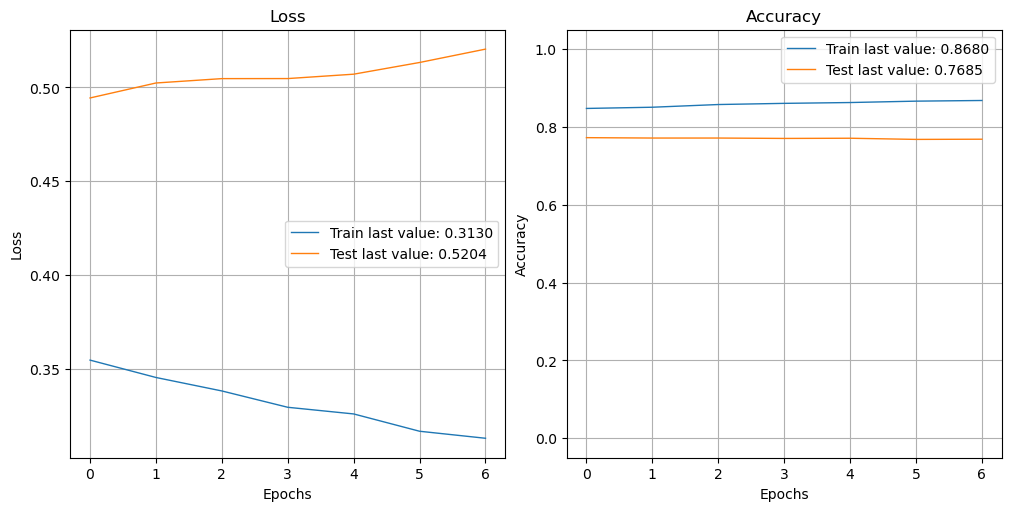

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       994
           1       0.77      0.73      0.75      1006

    accuracy                           0.75      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.75      0.75      0.75      2000

ROC_AUC_SCORE : 0.752638094971419
Accuracy : 0.7525


In [74]:
# MODEL
model_LSTM_stem = model_LSTM("LSTM_stem", 10000, 50, 50)
epochs = tunning(model_LSTM_stem, X_train_padded_stem, X_valid_padded_stem, y_train, y_valid)
MLFlow_tracking_avance(model_LSTM_stem, epochs, "LSTM_stem",
                       X_train_padded_stem, X_valid_padded_stem, X_test_padded_stem, y_train, y_valid, y_test)

In [75]:
# Enregistrement de mon model
model_LSTM_stem.save("LSTM_stem_Model_Final_Sentiment_Analysis")

INFO:tensorflow:Assets written to: LSTM_stem_Model_Final_Sentiment_Analysis\assets


INFO:tensorflow:Assets written to: LSTM_stem_Model_Final_Sentiment_Analysis\assets


Nous avons une `accuracy` et un `ROC_AUC_Score` sur le test set $\approx 75.70 \%$.

Nous sélectionnons la <span style = "color: blue">Stematisation</span> qui nous donne de meilleurs résultats.

---
<div class="alert alert-block alert-info" background: linear-gradient(90deg, #8360c3, #2ebf91);>
    <span style="color: blue;" font-family:'Arial';">
        <h3><center> Méthodes de Word Embedding - Word2Vec Embedding Vs GloVe Embedding  </center></h3></span>
                                                    
Le Word Embedding (ou plongement de mots) est une technique en traitement du langage naturel (NLP) qui consiste à représenter des mots sous forme de vecteurs de nombres réels dans un espace multidimensionnel. Ces vecteurs sont conçus de manière à capturer des informations sémantiques sur les mots. Le but du Word Embedding est de transformer des mots en des représentations vectorielles de telle sorte que des mots similaires aient des vecteurs similaires et que les opérations vectorielles sur ces représentations (par exemple, soustraction ou addition) aient un sens sémantique.</br>

Word2Vec et GloVe sont deux méthodes populaires pour créer des embeddings de mots, mais ils diffèrent dans leur approche de base pour obtenir ces embeddings.</br>

- <u><b>Word2Vec Embedding</u></b>:
Word2Vec (Word to Vector) est une famille d'algorithmes d'apprentissage automatique utilisés pour créer des embeddings de mots. Les deux variantes principales de Word2Vec sont Skip-gram et Continuous Bag of Words (CBOW).
L'idée principale de Word2Vec est d'apprendre les embeddings en utilisant un modèle de prédiction de mots contextuels. Il tente de prédire un mot en fonction de son contexte (les mots qui l'entourent) ou de prédire le contexte en fonction du mot en cours d'examen.</br>
Les embeddings résultants sont des vecteurs de mots qui capturent des relations sémantiques entre les mots. Par exemple, les mots similaires seront plus proches dans l'espace vectoriel.</br></br>

- <u><b>GloVe Embedding (Global Vectors for Word Representation)</u></b>:
GloVe est une autre technique d'embedding de mots qui repose sur des statistiques globales (d'où son nom) de co-occurrence des mots dans un corpus de texte. Contrairement à Word2Vec, qui est basé sur des prédictions locales, GloVe est basé sur des co-occurrences de mots dans l'ensemble du corpus.</br>
L'idée de GloVe est de créer une matrice de co-occurrence de mots, puis d'effectuer une factorisation sur cette matrice pour obtenir les embeddings des mots. La factorisation permet de capturer les relations sémantiques entre les mots.
Les embeddings GloVe ont tendance à bien saisir les relations sémantiques plus globales entre les mots, en particulier les relations de synonymie et d'antonymie.</br></br>

En résumé, la principale différence entre Word2Vec et GloVe réside dans la manière dont ils construisent les embeddings de mots. Word2Vec repose sur la prédiction de mots à partir de contextes locaux, tandis que GloVe utilise des statistiques globales de co-occurrence de mots pour obtenir des embeddings. Les deux méthodes ont des avantages et des inconvénients et le choix entre elles dépend du contexte et des besoins spécifiques de la tâche de NLP que vous traitez.</br></br></div>

---

<a name="C16"><h2><span style = "color : blue">III - Choix du Word Embedding</span></h2></a>

Nous allons maintenant utiliser deux méthodes de Word Embedding:

- <span style = "color: blue">Word2Vec</span> Embedding,
- <span style = "color: blue">Glove</span> Embedding (version améliorée de Word2Vec).

Ces méthodes permettrons de tenter d'améliorer nos résultats.

Commençons par modifier la fonction `sequences` pour récuperer le `word_index`.

In [76]:
def sequences_WE(X, y, max_len):
    
    X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, y, train_size = 0.8, random_state = 0)
    X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size = 0.5, random_state = 0)

    tokenizer = Tokenizer(num_words = 10000)
    tokenizer.fit_on_texts(X)

    word_index = tokenizer.word_index # Récupère le word_index

    X_train_sequences = tokenizer.texts_to_sequences(X_train)
    X_train_padded = pad_sequences(X_train_sequences, maxlen = max_len, padding = "post", truncating = "post")

    X_valid_sequences = tokenizer.texts_to_sequences(X_valid)
    X_valid_padded = pad_sequences(X_valid_sequences, maxlen = max_len, padding = "post", truncating = "post")
    
    X_test_sequences = tokenizer.texts_to_sequences(X_test)
    X_test_padded = pad_sequences(X_test_sequences, maxlen = max_len, padding = "post", truncating = "post")

    return X_train_padded, X_valid_padded, X_test_padded, word_index

Le code ci-dessus définit une fonction appelée **sequences_WE()** qui effectue plusieurs étapes pour **prétraiter les données** textuelles X et les étiquettes y **avant de les diviser en ensembles** d'entraînement, de validation et de test et de les retourner sous forme de séquences rembourrées. De plus, il **extrait également l'index des mots (word_index)** à partir du tokenizer.

<h3><span style = "color : darkgreen">1 - Word2Vec embedding</span></h3>

Nous allons commencer par récupérer nos séquences.

In [77]:
X_train_padded_W2V, X_valid_padded_W2V, X_test_padded_W2V, word_index_W2V = sequences_WE(
                                                                                     np.array(df_sample["text_stem"]),
                                                                                     np.array(df_sample["target"]),
                                                                                     300)

Nous allons charger le `Word2Vec` pré-entrainé de Gensim `word2vec-google-news-300` pour tester notre modèle.

In [78]:
#import gensim 
w2v = api.load("word2vec-google-news-300")

embedding_matrix_W2V = np.zeros((10000, 300))
for word, i in word_index_W2V.items():
    if i < 10000:
        if w2v.__contains__(word):
            embedding_matrix_W2V[i] = w2v.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix_W2V.shape)

Embedding Matrix Shape: (10000, 300)


Le code ci-dessus avait pour objectif de créer une matrice d'embedding de mots en utilisant des embeddings pré-entraînés issus du modèle Word2Vec de Google News. La boucle examine les 10 000 premiers mots et vérifie si le mot existe dans le modèle Word2Vec (w2v.__contains__(word)). Si le mot est trouvé dans le modèle, ses embeddings pré-entraînés (qui sont de dimension 300 dans ce cas) sont extraits à l'aide de w2v.__getitem__(word) et sont assignés à la ligne correspondante de la matrice embedding_matrix_W2V.</br>

En fin de compte, la matrice embedding_matrix_W2V contiendra les embeddings pré-entraînés de mots pour les 10 000 premiers mots de notre vocabulaire, si ces mots existent dans le modèle Word2Vec de Google News. Tous les autres éléments de la matrice resteront à zéro.</br>

Enfin, le code affiche la forme de la matrice d'embedding générée, qui est (10000, 300) dans ce cas.</br>

Cette matrice d'embedding peut être utilisée pour initialiser une couche d'embedding dans un modèle de réseau de neurones pour le traitement de texte. Elle permet d'exploiter des informations sémantiques pré-entraînées pour les mots dans notre modèle NLP.</br></br>

Testons notre modèle:

Model: "LSTM_W2V"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 300, 300)          3000000   
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               85248     
 nal)                                                            
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 3,085,313
Trainable params: 3,085,313
Non-trainable params: 0
_________________________________________________________________
Epoch 1/6
125/125 [==============================] - 81s 594ms/step - loss: 0.3128 - accuracy: 0.8668 - val_loss: 0.4862 - val_accuracy: 0.7710
Epoch 2/6
125/125 [==============================] - 74s 592ms/step - loss: 0.2958 - accuracy: 0.8754 

INFO:tensorflow:Assets written to: C:\Users\kfaiz\AppData\Local\Temp\tmp08ftf6ih\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kfaiz\AppData\Local\Temp\tmp08ftf6ih\model\data\model\assets


63/63 [==============================] - 4s 70ms/step


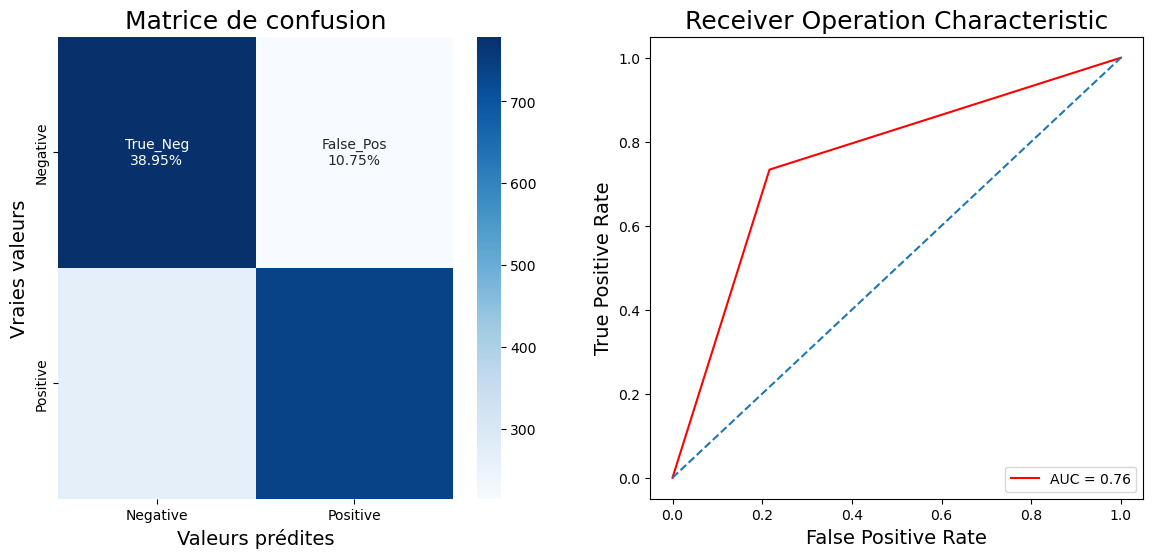

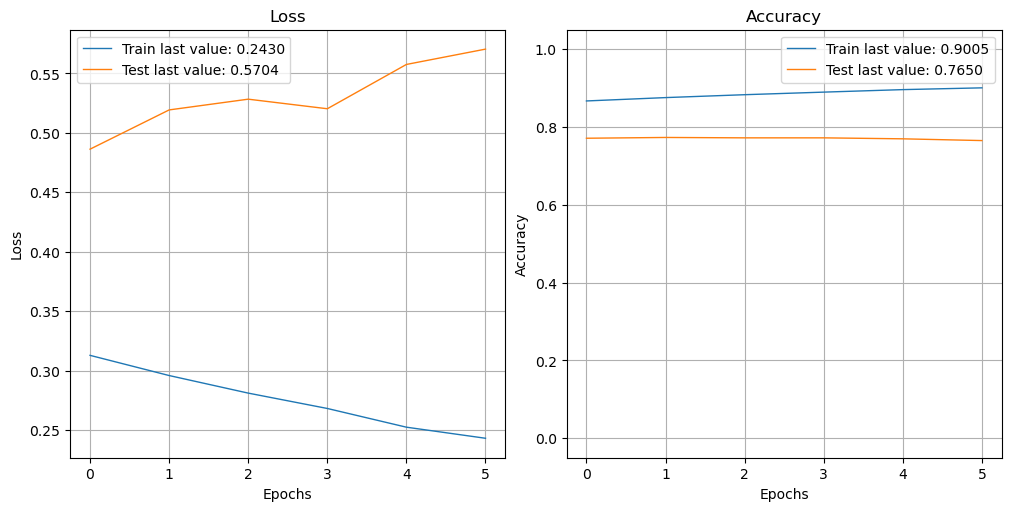

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       994
           1       0.77      0.73      0.75      1006

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000

ROC_AUC_SCORE : 0.7586503114112108
Accuracy : 0.7585


In [79]:
#MODEL
model_W2V = model_LSTM("LSTM_W2V", 10000, 300, 300)
model_W2V.layers[0].set_weights([embedding_matrix_W2V])
model_W2V.layers[0].trainable = True
#EPOCHS   
epochs = tunning(model_W2V, X_train_padded_W2V, X_valid_padded_W2V, y_train, y_valid)

#MLFLOW
MLFlow_tracking_avance(model_W2V, epochs, "LSTM_W2V",
                       X_train_padded_W2V, X_valid_padded_W2V, X_test_padded_W2V, y_train, y_valid, y_test)

In [80]:
# Enregistrement de mon model
model_W2V.save("LSTM_W2V_Model_Final_Sentiment_Analysis")

INFO:tensorflow:Assets written to: LSTM_W2V_Model_Final_Sentiment_Analysis\assets


INFO:tensorflow:Assets written to: LSTM_W2V_Model_Final_Sentiment_Analysis\assets


Nous avons une `accuracy` et un `ROC_AUC_Score` sur le test set $\approx 75.70\%$.

<h3><span style = "color : darkgreen">2 - Glove embedding</span></h3>

Nous allons commencer par récupérer nos séquences.

In [81]:
X_train_padded_Glove, X_valid_padded_Glove, X_test_padded_Glove, word_index_Glove = sequences_WE(
                                                                                        np.array(df_sample["text_stem"]),
                                                                                        np.array(df_sample["target"]),
                                                                                        50)

Nous allons charger le `Word Embedding Glove` pré-entrainé `glove.twitter.27B.50d` pour tester notre modèle.

In [83]:
### Glove Embedding ###
embeddings_index = {}

#f = open("Word_Embedding/glove.twitter.27B.50d.txt")
#f = open("glove.twitter.27B.50d.txt")
f = open("Word_Embedding/glove.twitter.27B.50d.txt", encoding="utf-8")

for line in f:
    values = line.split()
    embeddings_index[values[0]] = np.asarray(values[1:], dtype = "float32")
f.close()

#Embedding matrix avec nos tokens
embedding_matrix_Glove = np.zeros((10000, 50))
for word, i in word_index_Glove.items():
    if i < 10000:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix_Glove[i] = embedding_vector

Testons notre modèle:

Model: "LSTM_Glove"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 50, 50)            500000    
                                                                 
 bidirectional_4 (Bidirectio  (None, 64)               21248     
 nal)                                                            
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 521,313
Trainable params: 521,313
Non-trainable params: 0
_________________________________________________________________
Epoch 1/9
  5/125 [>.............................] - ETA: 6s - loss: 0.4454 - accuracy: 0.7891WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0489s vs `on_train_batch_end` time: 0.1680s). Ch

125/125 [==============================] - 13s 63ms/step - loss: 0.4227 - accuracy: 0.8080 - val_loss: 0.4613 - val_accuracy: 0.7870
Epoch 2/9
125/125 [==============================] - 7s 56ms/step - loss: 0.4210 - accuracy: 0.8075 - val_loss: 0.4514 - val_accuracy: 0.7855
Epoch 3/9
125/125 [==============================] - 7s 55ms/step - loss: 0.4087 - accuracy: 0.8154 - val_loss: 0.4764 - val_accuracy: 0.7755
Epoch 4/9
125/125 [==============================] - 7s 54ms/step - loss: 0.4006 - accuracy: 0.8189 - val_loss: 0.4611 - val_accuracy: 0.7920
Epoch 5/9
125/125 [==============================] - 7s 57ms/step - loss: 0.3910 - accuracy: 0.8274 - val_loss: 0.4648 - val_accuracy: 0.7915
Epoch 6/9
125/125 [==============================] - 7s 56ms/step - loss: 0.3828 - accuracy: 0.8278 - val_loss: 0.4615 - val_accuracy: 0.7945
Epoch 7/9
125/125 [==============================] - 7s 59ms/step - loss: 0.3754 - accuracy: 0.8322 - val_loss: 0.4795 - val_accuracy: 0.7840
Epoch 8/9
125/1

INFO:tensorflow:Assets written to: C:\Users\kfaiz\AppData\Local\Temp\tmp4dr2m4f7\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kfaiz\AppData\Local\Temp\tmp4dr2m4f7\model\data\model\assets


63/63 [==============================] - 1s 12ms/step


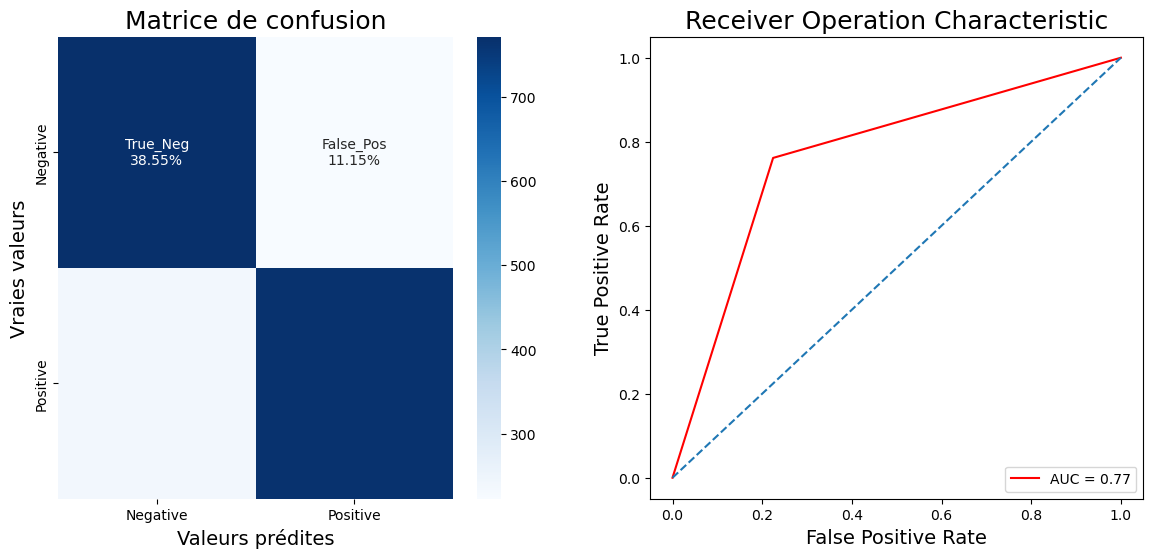

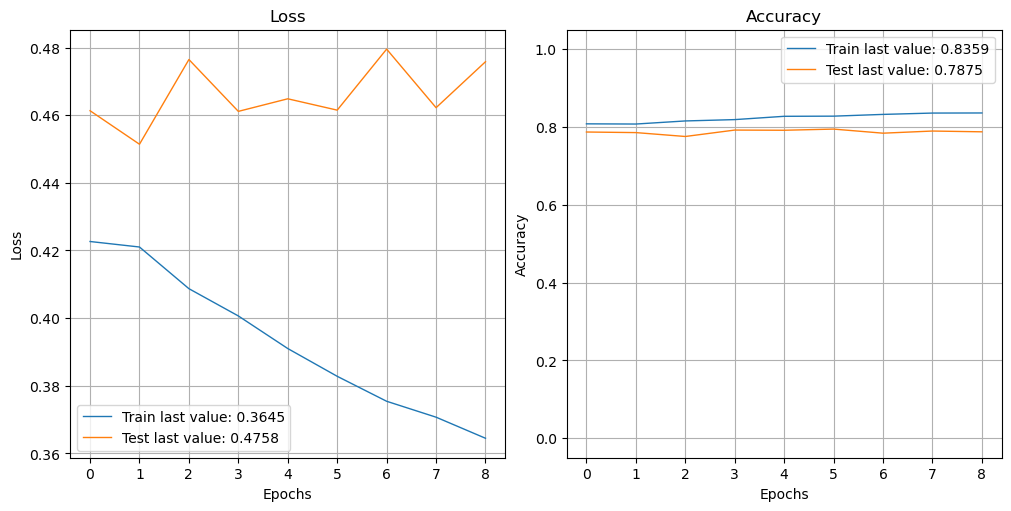

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       994
           1       0.77      0.76      0.77      1006

    accuracy                           0.77      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.77      0.77      0.77      2000

ROC_AUC_SCORE : 0.7685426675360313
Accuracy : 0.7685


In [84]:
#MODEL
model_Glove = model_LSTM("LSTM_Glove", 10000, 50, 50)
model_Glove.layers[0].set_weights([embedding_matrix_Glove])
model_Glove.layers[0].trainable = True

#EPOCHS   
epochs = tunning(model_Glove, X_train_padded_Glove, X_valid_padded_Glove, y_train, y_valid)

#MLFLOW
MLFlow_tracking_avance(model_Glove, epochs, "LSTM_Glove",
                       X_train_padded_Glove, X_valid_padded_Glove, X_test_padded_Glove, y_train, y_valid, y_test)

In [85]:
# Enregistrement de mon model
model_Glove.save("Glove_Model_Final_Sentiment_Analysis")

INFO:tensorflow:Assets written to: Glove_Model_Final_Sentiment_Analysis\assets


INFO:tensorflow:Assets written to: Glove_Model_Final_Sentiment_Analysis\assets


Nous avons une `accuracy` et un `ROC_AUC_Score` sur le test set $\approx 77.55\%$.

Nous sélectionnons le <span style = "color: blue">Glove Embedding</span> qui nous donne de meilleur résultats.

<a name="C17"><h2><span style = "color : blue">IV - Choix du modèle final</span></h2></a>

<h3><span style = "color : darkgreen">1 - Résumé des modèles via MLflow</span></h3>

Nous avons créé six modèles, voici les résultats obtenus:
    
- <span style = "color: blue">Modèle Dense</span> $\approx 74.40\%$,
- <span style = "color: blue">Modèle LSTM</span> $\approx  75.60\%$,
- <span style = "color: blue">Modèle LSTM Lemmatisé</span> $\approx 75.55\%$,
- <span style = "color: blue">Modèle LSTM Stematisé</span> $\approx 75.70\%$,
- <span style = "color: blue">Modèle LSTM Stematisé avec Word2Vec embedding</span> $\approx 75,70\%$,
- <span style = "color: blue">Modèle LSTM Stematisé avec Glove embedding</span> $\approx 77.20\%$.

Voici un récapitulatif des résultats obtenus avec l'UI de MLFlow:


|              | Modèle_Dense | Modèle_LSTM | LSTM_Lem | LSTM_Stem | LSTM_W2V | LSTM_Glove |
|--------------|--------------|-------------|----------|-----------|----------|------------|
| Time_fit     | 6.40         | 35.66       | 32.60    | 36.30     | 457.70   | 51.13      |
| Time_pred    | 0.18         | 0.75        | 0.76     | 0.75      | 3.10     | 0.80       |
| Epochs       | 4            | 6           | 5        | 6         | 9        | 8          |
| Accuracy     | 0.864        | 0.825       | 0.809    | 0.828     | 0.914    | 0.823      |
| Loss         | 0.329        | 0.394       | 0.425    | 0.394     | 0.212    | 0.395      |
| Val_accuracy | 0.749        | 0.774       | 0.77     | 0.774     | 0.767    | 0.785      |
| Val_loss     | 0.52         | 0.476       | 0.477    | 0.48      | 0.59     | 0.466      |
    
    
Le meilleur modèle que nous avons entraîné est le <span style = "color: blue">Modèle LSTM Stematisé avec Glove embedding</span> avec une accuracy test de $\approx 77.20\%$. Réentrainons ce modèle avec plus de tweets $(200~000)$ afin d'améliorer son apprentissage.

In [87]:
df_sample_large = pd.concat([df[df["target"] == 0].sample(100000, random_state = 0), #Négatif
                             df[df["target"] == 1].sample(100000, random_state = 0)], #Positif
                             ignore_index = True)


In [88]:
# Créez une nouvelle colonne vide pour stocker les textes stemmatisés
df_sample_large["text_stem"] = ""

# Parcourez chaque ligne du DataFrame
for index, row in df_sample_large.iterrows():
    text = row["text"]  # Récupérez le texte de la colonne "text"
    tokens = nlp(text)  # Appliquez le traitement NLP
    stemmed_tokens = [stemmer.stem(token.text) for token in tokens]  # Stemmatisation des tokens
    stemmed_text = " ".join(stemmed_tokens)  # Joignez les tokens stemmatisés en une seule chaîne
    df_sample_large.at[index, "text_stem"] = stemmed_text  # Mettez à jour la colonne "text_stem"

In [89]:
df_sample_large.to_csv('CSV/df_sample_large.csv', index = False)

In [90]:
#Split
X, y = np.array(df_sample_large["text_stem"]), np.array(df_sample_large["target"])
X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, y, train_size = 0.8, random_state = 0)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size = 0.5, random_state = 0)

In [91]:
#Sequences
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(X)

word_index_Final = tokenizer.word_index # Récupère le word_index

X_train_sequences_Final = tokenizer.texts_to_sequences(X_train)
X_train_padded_Final = pad_sequences(X_train_sequences_Final, maxlen = 50, padding = "post", truncating = "post")

X_valid_sequences_Final = tokenizer.texts_to_sequences(X_valid)
X_valid_padded_Final = pad_sequences(X_valid_sequences_Final, maxlen = 50, padding = "post", truncating = "post")
    
X_test_sequences_Final = tokenizer.texts_to_sequences(X_test)
X_test_padded_Final = pad_sequences(X_test_sequences_Final, maxlen = 50, padding = "post", truncating = "post")

In [93]:
### Glove Embedding ###
embeddings_index = {}

#f = open("Word_Embedding/glove.twitter.27B.50d.txt")
#f = open("glove.twitter.27B.50d.txt")
f = open("Word_Embedding/glove.twitter.27B.50d.txt", encoding="utf-8")

for line in f:
    values = line.split()
    embeddings_index[values[0]] = np.asarray(values[1:], dtype = "float32")
f.close()

In [94]:
#Embedding matrix avec nos tokens 
embedding_matrix_Final = np.zeros((10000, 50))
for word, i in word_index_Final.items():
    if i < 10000:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix_Final[i] = embedding_vector

Model: "LSTM_Final"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 50, 50)            500000    
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               21248     
 nal)                                                            
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 521,313
Trainable params: 521,313
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
   5/1250 [..............................] - ETA: 1:01 - loss: 0.4180 - accuracy: 0.8078 WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0489s vs `on_train_batch_end` time: 0.1688

1250/1250 [==============================] - 76s 56ms/step - loss: 0.4001 - accuracy: 0.8186 - val_loss: 0.4240 - val_accuracy: 0.8091
Epoch 2/10
1250/1250 [==============================] - 70s 56ms/step - loss: 0.3971 - accuracy: 0.8206 - val_loss: 0.4225 - val_accuracy: 0.8083
Epoch 3/10
1250/1250 [==============================] - 70s 56ms/step - loss: 0.3929 - accuracy: 0.8224 - val_loss: 0.4224 - val_accuracy: 0.8098
Epoch 4/10
1250/1250 [==============================] - 70s 56ms/step - loss: 0.3919 - accuracy: 0.8238 - val_loss: 0.4198 - val_accuracy: 0.8127
Epoch 5/10
1250/1250 [==============================] - 70s 56ms/step - loss: 0.3896 - accuracy: 0.8249 - val_loss: 0.4222 - val_accuracy: 0.8120
Epoch 6/10
1250/1250 [==============================] - 71s 57ms/step - loss: 0.3870 - accuracy: 0.8260 - val_loss: 0.4151 - val_accuracy: 0.8104
Epoch 7/10
1250/1250 [==============================] - 70s 56ms/step - loss: 0.3856 - accuracy: 0.8274 - val_loss: 0.4169 - val_accura

INFO:tensorflow:Assets written to: C:\Users\kfaiz\AppData\Local\Temp\tmpehgn1c18\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\kfaiz\AppData\Local\Temp\tmpehgn1c18\model\data\model\assets


625/625 [==============================] - 8s 12ms/step


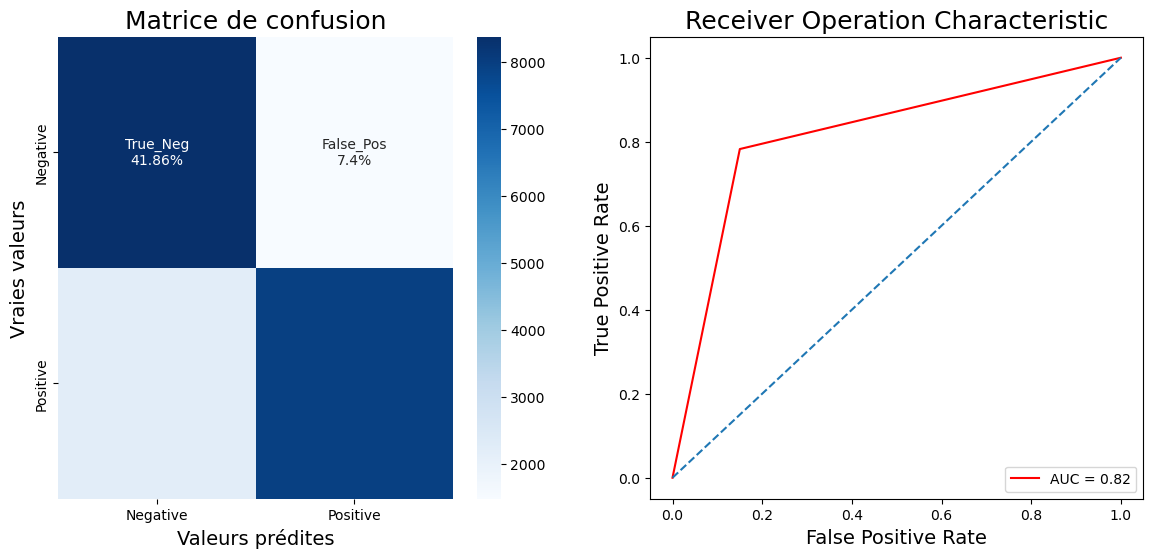

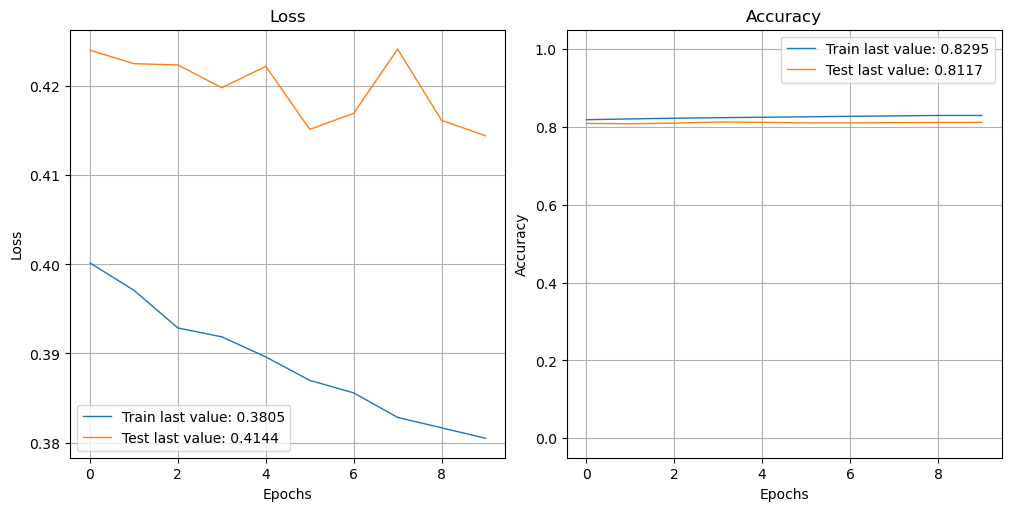

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      9850
           1       0.84      0.78      0.81     10150

    accuracy                           0.82     20000
   macro avg       0.82      0.82      0.82     20000
weighted avg       0.82      0.82      0.82     20000

ROC_AUC_SCORE : 0.8162046460453602
Accuracy : 0.8157


In [95]:
#MODEL
model_Final = model_LSTM("LSTM_Final", 10000, 50, 50)
model_Final.layers[0].set_weights([embedding_matrix_Final])
model_Final.layers[0].trainable = True
#EPOCHS   
epochs = tunning(model_Final, X_train_padded_Final, X_valid_padded_Final, y_train, y_valid)

#MLFLOW
MLFlow_tracking_avance(model_Final, epochs, "LSTM_Final",
                       X_train_padded_Final, X_valid_padded_Final, X_test_padded_Final, y_train, y_valid, y_test)

Nous avons ainsi une `accuracy` et un `ROC_AUC_Score` final $\approx 81.57\%$ sur le test set.

In [96]:
# Enregistrement de mon model
model_Final.save("model_LSTM_Stem_Glove_Emb_Final_Sentiment_Analysis")

INFO:tensorflow:Assets written to: model_LSTM_Stem_Glove_Emb_Final_Sentiment_Analysis\assets


INFO:tensorflow:Assets written to: model_LSTM_Stem_Glove_Emb_Final_Sentiment_Analysis\assets


<a name="C18"><h2><span style = "color : blue">V - Modèle BERT (hugging face)</span></h2></a>

Nous allons étudier l’apport en performance d’un modèle BERT.

In [97]:
#modèle BERT Pré-entrainé
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels = 2)

#Input & Mask
input_ids = []
attention_masks = []

#Collecte des données
for text in df_sample["text_stem"]:
    BERT = bert_tokenizer.encode_plus(text, add_special_tokens = True, max_length = 50, truncation = True,
                                      padding = "max_length", return_attention_mask = True)
    
    input_ids.append(BERT["input_ids"])
    attention_masks.append(BERT["attention_mask"])

input_ids = np.asarray(input_ids)
attention_masks = np.array(attention_masks)
labels = np.array(df_sample["target"])

#Séparation des données 
inp_train, inp_valid_test, label_train, label_valid_test, mask_train, mask_valid_test = train_test_split(input_ids,
                                                                                                         labels,
                                                                                                         attention_masks,
                                                                                                         train_size = 0.8,
                                                                                                         random_state = 0)

inp_valid, inp_test, label_valid, label_test, mask_valid, mask_test = train_test_split(inp_valid_test, 
                                                                                       label_valid_test,
                                                                                       mask_valid_test, 
                                                                                       train_size = 0.5,
                                                                                       random_state = 0)
# Résumé du modèle BERT (bert_model) pour afficher sa structure
bert_model.summary()

# Compilation du modèle en spécifiant la fonction de perte, l'optimiseur et les métriques.
bert_model.compile(loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                   optimizer = keras.optimizers.Adam(learning_rate = 2e-5,epsilon = 1e-08),
                   metrics = [keras.metrics.SparseCategoricalAccuracy('accuracy')])

# Entraînement du modèle BERT (bert_model) à l'aide des données d'entraînement
history = bert_model.fit([inp_train, mask_train], label_train,
                         batch_size = 64, epochs = 4,
                         validation_data = ([inp_valid, mask_valid],label_valid))

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
250/250 [==============================] - 2480s 10s/step - loss: 0.4862 - accuracy: 0.7697 - val_loss: 0.4076 - val_accuracy: 0.8130
Epoch 2/4
250/250 [==============================] - 2473s 10s/step - loss: 0.3584 - accuracy: 0.8479 - val_loss: 0.4021 - val_accuracy: 

Nous avons ainsi une `accuracy` et un `ROC_AUC_Score` final $\approx 82.55\%$ sur le test set.

D'après les résultats, nous avons des <span style = "color: blue">avantages</span> avec ce modèle. en effet, nous avons des résultats satisfaisant avec un <span style = "color: blue">petit sample de données</span>, des <span style = "color: blue">hyperparamètres et un nombre d'epochs non optimisés</span>.

Ainsi, si nous n'avions pas de <span style = "color: blue">contrainte de temps</span>, Il serait intéressant <span style = "color: blue">d'investir dans ce type de modèle</span> que nous pourrions optimiser afin d'obtenir d'encore meilleurs résultats.

D'après les résultats, nous avons des <span style = "color: blue">avantages</span> avec ce modèle. en effet, nous avons des résultats satisfaisant avec un <span style = "color: blue">petit sample de données</span>, des <span style = "color: blue">hyperparamètres et un nombre d'epochs non optimisés</span>.

Ainsi, si nous n'avions pas de <span style = "color: blue">contrainte de temps</span>, Il serait intéressant <span style = "color: blue">d'investir dans ce type de modèle</span> que nous pourrions optimiser afin d'obtenir d'encore meilleurs résultats.
MLOps est une approche qui vise à industrialiser le processus de développement, de déploiement et de gestion des modèles de machine learning, en intégrant des pratiques d'automatisation, de collaboration et de contrôle de version pour améliorer l'efficacité, la fiabilité et la scalabilité de ces systèmes dans un contexte opérationnel.

In [98]:
# Enregistrement de mon model
bert_model.save("model_bert_Final_Sentiment_Analysis")

INFO:tensorflow:Assets written to: model_bert_Final_Sentiment_Analysis\assets


INFO:tensorflow:Assets written to: model_bert_Final_Sentiment_Analysis\assets


---
<div class="alert alert-block alert-info"><center><b> MLOps - Machine Learning Operations</b></center>

MLOps est une approche qui vise à industrialiser le processus de développement, de déploiement et de gestion des modèles de machine learning, en intégrant des pratiques d'automatisation, de collaboration et de contrôle de version pour améliorer l'efficacité, la fiabilité et la scalabilité de ces systèmes dans un contexte opérationnel.
    
Voici les étapes d'un processus MLOps typique:

<b>1. <u>Collecte et préparation des données</b></u>:
        Collecte des données pertinentes pour l'entraînement du modèle.
        Nettoyage et préparation des données, y compris le traitement des valeurs manquantes, la normalisation, la 
        transformation, etc.</br>

<b>2. <u>Développement du modèle</b></u>:
        Les data scientists construisent, entraînent et évaluent des modèles de machine learning en utilisant divers algorithmes
        et techniques. Les modèles sont évalués en utilisant des métriques appropriées pour mesurer leur performance.</br>

<b>3. <u>Gestion du code source</b></u>:
        Utilisation de systèmes de contrôle de version (comme Git) pour suivre les modifications apportées au code source du 
        modèle, y compris les scripts de formation, les notebooks, etc.</br>

<b>4. <u>Tests automatisés</b></u>:
        Création de tests automatisés pour vérifier la qualité du modèle et du code.
        Les tests peuvent inclure la validation des données d'entrée, la validation des performances du modèle, etc.</br>

<b>5. <u>Déploiement</b></u>:
        Le modèle est empaqueté et déployé dans un environnement de test ou de pré-production.
        Automatisation du processus de déploiement pour garantir une mise en production efficace.</br>

<b>6. <u>Surveillance</b></u>:
        Surveillance continue de la performance du modèle en production.
        Détection d'anomalies ou de dégradations de performance et envoi d'alertes si nécessaire.</br>

<b>7. <u>Maintenance et mise à jour</b></u>:
        Révision et mise à jour régulières du modèle en fonction des nouvelles données ou des besoins changeants.
        Possibilité de réentraîner le modèle avec de nouvelles données.</br>

<b>8. <u>Gestion des versions</b></u>:
        Utilisation de la gestion des versions pour gérer différentes versions du modèle, ce qui permet de rétrograder en cas de problème et de déployer de nouvelles versions en douceur.</br>

<b>9. <u>Gestion de la sécurité et de la gouvernance</b></u>:
        Assurer la sécurité des données, notamment la protection des données sensibles.
        Se conformer aux réglementations et aux politiques de sécurité de l'entreprise.</br>

<b>10. <u>Scalabilité</b></u>:
        Mettre en place une infrastructure qui peut gérer des modèles de machine learning à grande échelle en fonction des besoins de production.</br>

<b>11. <u>Documentation</b></u>:
        Fournir une documentation complète pour le modèle, le code, les données et les processus, facilitant la compréhension et la maintenance.</br>

Ces étapes forment la base d'un processus MLOps simplifié. Il est important de noter que ces étapes peuvent varier en fonction des besoins spécifiques de chaque projet, de l'entreprise et des technologies utilisées. L'automatisation, la collaboration et la reproductibilité sont des éléments clés pour garantir le succès de ce processus.</br>
</div>

---

## <div class="alert alert-block alert-info"><a name="C19"><center> Partie 5 - Démarche orientée MLOps</a></center></div>

---
### <div class="alert alert-block alert-info"><a name="C19"><center>Démarches MLOps</a></center>

Afin de mettre en place un flux de travail MLOps avec GitHub, MLflow, Flask, Azure Web App et Streamlit pour tester notre modèle de prédiction des "bad buzz", nous allons suivre les étapes suivantes:

<u>1. Préparation des données et entraînement du modèle avec MLflow</u>:</br>
- Nous avons préparé nos données et créé un modèle de prédiction des "bad buzz" en utilisant les bibliothèques Python (pandas, scikit-learn, etc.).
- Nous avons utilisé MLflow pour gérer nos expériences ML, suivre les métriques et enregistrer nos modèles. Pour ce faire, nous avons utilisé mlflow.start_run(), mlflow.log_param(), mlflow.log_metric(), mlflow.log_artifact() et mlflow.sklearn.log_model().
Enregistrez le modèle dans un répertoire spécifique à l'aide de MLflow.

<u>2. Dépôt du projet sur GitHub<u/>:</br>
 - Nous devons créer un référentiel (repository) sur GitHub pour stocker notre code,
 - Cloner notre référentiel sur notre machine en local,
 - Ajoutez notre code source, notre modèle enregistré et tous les fichiers nécessaires au dépôt.
 - Effectuer des commits et des pushs vers GitHub pour garder le référentiel à jour.<br>
 
<u>3. Déploiement de l'API Flask sur Azure Web App</u>:</br>
 - Créer une API Flask qui prend le texte brut (le tweet) en entrée et renvoie le sentiment associé en utilisant le modèle ML enregistré.
 - Utiliser Azure Web App pour déployer notre API Flask. 
 
 Voici les étapes générales:<br>
 1. Créer une application Web sur Azure.
 2. Configurer l'application pour exécuter notre API Flask (nous pouvons utiliser Docker ou un environnement d'exécution Python directement).
 3. Nous devons s'assurer que notre API Flask est exposée via une URL accessible sur Internet.<br>

<u>4. Exécution automatique de tests unitaires</u>:</br>
 - Créer des tests unitaires pour notre API Flask pour nous assurer que le service fonctionne correctement.
 - Utiliser un outil de test Python tel que unittest ou pytest pour écrire et exécuter ces tests.
 - Intégrer ces tests unitaires dans notre pipeline de CI/CD sur GitHub (par exemple, GitHub Actions).<br>

<u>5. Interface Streamlit en local</u>:<br>

Créez une application Streamlit qui permet aux utilisateurs locaux de saisir du texte brut (le tweet).
Utilisez l'URI de l'API déployée sur Azure pour envoyer les données et afficher le sentiment associé.
Testez l'interface Streamlit localement pour vous assurer qu'elle fonctionne correctement.<br>

<u>6. Intégration de tout dans un pipeline MLOps</u>:<br>
 - Automatiser autant que possible ces étapes en les intégrant dans un pipeline MLOps. nous pouvons utiliser des outils comme Azure DevOps, Jenkins, CircleCI, ou GitHub Actions pour gérer le pipeline.
 - Configurer des déclencheurs pour exécuter automatiquement les tests unitaires et le déploiement de l'API Flask lorsqu'il y a des changements dans le référentiel GitHub.
 - S'assurer également de gérer les dépendances de manière appropriée (par exemple, avec un fichier requirements.txt), d'utiliser des fichiers de configuration pour stocker des secrets (comme les clés d'API Azure) et de documenter correctement chaque étape du processus.

Ce processus de bout en bout devrait nous permettre de créer un pipeline MLOps complet pour notre modèle de prédiction des "bad buzz".

</div>

---

<a name="C20"><h2><span style = "color : blue">I - Principe du MLOps</span></h2></a>

<h3><span style = "color : darkgreen">1 - Qu'est-ce que le MLOps ?</span></h3>

Le <span style = "color: blue">MLOps (Machine Learning Operations)</span> est un processus <span style = "color: blue">transverse</span>, <span style = "color: blue">collaboratif</span> et <span style = "color: blue">itératif</span> qui opérationnalise la Data Science en traitant le Machine Learning (ML) et d’autres types de modèles comme des artefacts logiciels réutilisables qui peuvent être <span style = "color: blue">déployés et surveillés continuellement via un processus reproductible</span>.

Le MLOps prend en charge <span style = "color: blue">l’intégration continue</span>, ainsi que le <span style = "color: blue">déploiement rapide</span> et <span style = "color: blue">reproductible</span> des modèles. Il aide ainsi les utilisateurs métier à faire émerger plus rapidement de précieuses informations exploitables de leurs données. Le MLOps implique également une <span style = "color: blue">surveillance</span> et un <span style = "color: blue">réentraînement continuels</span> des modèles en production afin de s’assurer qu’ils fonctionnent de manière optimale à mesure que les données changent au fil du temps (<span style = "color: blue">data drift</span>).

<h3><span style = "color : darkgreen">2 - Etapes d’un processus MLOps simplifié</span></h3>

<h4><span style = "color : darkorange">Création / Build</span></h4>
Cette étape inclut:

- La <span style = "color: blue">préparation des données</span>,
- Le <span style = "color: blue">feature engineering</span>,
- La <span style = "color: blue">création des modèles et les tests.</span>.

<h4><span style = "color : darkorange">Gestion / Manage</span></h4>
Une fois les modèles créés, ils sont généralement <span style = "color: #7F00FF">placés dans un repository</span> (de type GitHub par exemple) afin de <span style = "color: blue">favoriser leur réutilisation</span> dans l’ensemble de l’entreprise.

<h4><span style = "color : darkorange">Déploiement / Deploy</span></h4>
Cette étape consiste à <span style = "color: blue">exporter le modèle</span> (ou la pipeline), à le <span style = "color: blue">déployer</span> et à <span style = "color: blue">l'intégrer</span> à des <span style = "color: blue">systèmes et des applications de production</span>.

<h4><span style = "color : darkorange">Surveillance / Monitor</span></h4>
Cette étape nécessite d'avoir une <span style = "color: blue">surveillance continue</span> pour garantir des <span style = "color: blue">performances optimales</span>. À mesure que les données changent, le modèle peut être <span style = "color: blue">réentraîné</span> ou <span style = "color: blue">remplacé</span> par un nouveau modèle.


<a name="C21"><h2><span style = "color : blue">II - Application du MLOps à nos données</span></h2></a>

Revenons à nos données, nous avons interprété <span style = "color: blue">de manière globale</span> nos résultats (totalité des données) , nous allons maintenant les étudier <span style = "color: blue">de manière locale</span> (tweet par tweet) en créant un <span style = "color: blue">prototype permettant de prédire le sentiment associé à un tweet orienté MLOps</span>. Reprenons les étapes vu précédemment:

<h4><span style = "color : darkorange">Création</span></h4>
Pour cette partie, nous avons <span style = "color: blue">préparé nos données</span> puis <span style = "color: blue">créé nos modèles</span> que nous avons <span style = "color: blue">stocké à l'aide de l'environnement MLFlow</span>.

<h4><span style = "color : darkorange">Gestion</span></h4>
Dans cette partie, nous allons <span style = "color: blue">déposer notre projet sur Github</span>. Nous pouvons le consulter sur https://github.com/F-KAD/Projet-7_Bad_Buzz_Detection.git

<h4><span style = "color : darkorange">Déploiement</span></h4>
Dans cette partie, nous allons <span style = "color: blue">déployer une API de prédiction</span> (Flask) intégrant <span style = "color: blue">l’exécution automatique de tests unitaires sur Azure Webapp</span>. Nous pourrons ainsi via une <span style = "color: blue">interface streamlit</span> (en local) saisir du texte brut (le tweet) puis par <span style = "color: blue">appel de l’API via son URI</span>, réceptionner et afficher le sentiment associé.

Voir les fichiers pythons : `app.py` et `stream.py`

<h4><span style = "color : darkorange">Surveillance</span></h4>
Nous ne traiterons pas cette partie car ce n'est pas le but du projet. Si nous devions réaliser cette étape nous pourrions <span style = "color: blue">réentrainer notre modèle avec plus de tweet</span> dans le temps ou même le <span style = "color: blue">remplacer par un modèle plus performant</span>.

## <div class="alert alert-block alert-info"><a name="C1"><center> Conclusion</a></center></div>

Commençons par résumer notre travail:

- Nous avons commencé par <span style = "color: blue">collecter</span>, <span style = "color: blue">étudier</span> puis <span style = "color: blue">nettoyer nos données</span>.
- Ensuite, Nous avons <span style = "color: blue">préparé l'environnement MLFlow</span> permettant le <span style = "color: blue">tracking</span> et le <span style = "color: blue">stockage</span> des données.
- Puis, nous avons <span style = "color: blue">créé des modèles sur mesures simples et avancés</span>, pour lesquels nous avons sélectionné les meilleurs afin de les optimiser.
- Nous terminons par <span style = "color: blue">mettre en production notre meilleur modèle</span> pour réaliser un prototype d’un produit IA permettant de prédire le sentiment associé à un tweet.

Pour conclure, nous devions réaliser un prototype d’un produit IA qui renvoie un sentiment associée à un tweet donné en entrée. Ainsi nous avons pu le réaliser via une interface streamlit qui récupère un tweet en entrée et renvoie en sortie le sentiment associé fournis par l'API (Flask) de prédiction utilisant notre modèle avancé le plus performant stocké via MLFlow.

<a name="C22"><center><h2><span style = "color : blue">Ouverture</span></h2></center></a>

Maintenant que nous avons réalisé un prototype, si celui-ci est validé par l'entreprise, nous pourrions aller plus loin dans notre démarche en optimisant encore plus nos modèles (hyperparamètres, plus de données, modèles de deep learning plus poussés ...) afin d'avoir un produit encore plus performant.